## Predicting Credit Card Approvals<a href="#Predicting-Credit-Card-Approvals" class="anchor-link">¶</a>

### Every week, millions of people around the world apply to have credit issued to them in the form of a credit card. However determining how much credit to approve, and whether to approve the customer at all is a challenge that faces every major bank. Today, most banks take advantage of trained models that can predict whether or not someone should be issued a credit card. In this simple example we will look at training a model on a sample dataset to predict whether or not a credit card application should be accepted or rejected.<a
href="#Every-week,-millions-of-people-around-the-world-apply-to-have-credit-issued-to-them-in-the-form-of-a-credit-card.-However-determining-how-much-credit-to-approve,-and-whether-to-approve-the-customer-at-all-is-a-challenge-that-faces-every-major-bank.-Today,-most-banks-take-advantage-of-trained-models-that-can-predict-whether-or-not-someone-should-be-issued-a-credit-card.-In-this-simple-example-we-will-look-at-training-a-model-on-a-sample-dataset-to-predict-whether-or-not-a-credit-card-application-should-be-accepted-or-rejected."
class="anchor-link">¶</a>

#### Problem in any business:<a href="#Problem-in-any-business:" class="anchor-link">¶</a>

when credit card approvals are granted incorrectly (to individuals who
may not be creditworthy), there is a higher likelihood that those
individuals will default on their bill payments. This would result in
losses for the bank.

## Uploading Dataset<a href="#Uploading-Dataset" class="anchor-link">¶</a>

In \[1\]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    credit_card_df= pd.read_csv('Credit_card.csv')
    credit_label_df= pd.read_csv('Credit_card_label.csv')

In \[2\]:

    final_credit_card= pd.merge(credit_card_df,credit_label_df,on='Ind_ID',how='inner')
    final_credit_card.head()

Out\[2\]:

|     | Ind_ID  | GENDER | Car_Owner | Propert_Owner | CHILDREN | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|---------|--------|-----------|---------------|----------|---------------|----------------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 0   | 5008827 | M      | Y         | Y             | 0        | 180000.0      | Pensioner            | Higher education | Married        | House / apartment | -18772.0       | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     |
| 1   | 5009744 | F      | Y         | N             | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | -13557.0       | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |
| 2   | 5009746 | F      | Y         | N             | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | NaN            | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |
| 3   | 5009749 | F      | Y         | N             | 0        | NaN           | Commercial associate | Higher education | Married        | House / apartment | -13557.0       | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |
| 4   | 5009752 | F      | Y         | N             | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | -13557.0       | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |

### Copy of the final dataset<a href="#Copy-of-the-final-dataset" class="anchor-link">¶</a>

In \[3\]:

    dataset=final_credit_card.copy()

In \[4\]:

    dataset.head(3)

Out\[4\]:

|     | Ind_ID  | GENDER | Car_Owner | Propert_Owner | CHILDREN | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|---------|--------|-----------|---------------|----------|---------------|----------------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 0   | 5008827 | M      | Y         | Y             | 0        | 180000.0      | Pensioner            | Higher education | Married        | House / apartment | -18772.0       | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     |
| 1   | 5009744 | F      | Y         | N             | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | -13557.0       | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |
| 2   | 5009746 | F      | Y         | N             | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | NaN            | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |

In \[5\]:

    dataset.tail(3)

Out\[5\]:

|      | Ind_ID  | GENDER | Car_Owner | Propert_Owner | CHILDREN | Annual_income | Type_Income | EDUCATION                     | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|------|---------|--------|-----------|---------------|----------|---------------|-------------|-------------------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 1545 | 5115992 | M      | Y         | Y             | 2        | 180000.0      | Working     | Higher education              | Married        | House / apartment | -13174.0       | -2477         | 1            | 0          | 0     | 0        | Managers        | 4              | 0     |
| 1546 | 5118219 | M      | Y         | N             | 0        | 270000.0      | Working     | Secondary / secondary special | Civil marriage | House / apartment | -15292.0       | -645          | 1            | 1          | 1     | 0        | Drivers         | 2              | 0     |
| 1547 | 5053790 | F      | Y         | Y             | 0        | 225000.0      | Working     | Higher education              | Married        | House / apartment | -16601.0       | -2859         | 1            | 0          | 0     | 0        | NaN             | 2              | 0     |

### Data Inspection and Cleaning<a href="#Data-Inspection-and-Cleaning" class="anchor-link">¶</a>

Now that I've loaded in our data and taken a quick look at it, let's
look for missing values and clean the data accordingly. It's worth
noting that I've done this step before visualisation - a case can be
made to visualise the data before you clean it, or to visualise the data
initially, then clean it, then visualise it again, but in a dataset like
this where there are very few missing values we can simply clean it
initially and then visualise it later.

### Checking Missing values<a href="#Checking-Missing-values" class="anchor-link">¶</a>

#### Checking percentage of the missing values<a href="#Checking-percentage-of-the-missing-values"
class="anchor-link">¶</a>

In \[6\]:

    dataset.isnull().sum()/len(dataset)*100

Out\[6\]:

    Ind_ID              0.000000
    GENDER              0.452196
    Car_Owner           0.000000
    Propert_Owner       0.000000
    CHILDREN            0.000000
    Annual_income       1.485788
    Type_Income         0.000000
    EDUCATION           0.000000
    Marital_status      0.000000
    Housing_type        0.000000
    Birthday_count      1.421189
    Employed_days       0.000000
    Mobile_phone        0.000000
    Work_Phone          0.000000
    Phone               0.000000
    EMAIL_ID            0.000000
    Type_Occupation    31.524548
    Family_Members      0.000000
    label               0.000000
    dtype: float64

## Renaming the Features<a href="#Renaming-the-Features" class="anchor-link">¶</a>

In \[7\]:

    dataset.columns

Out\[7\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
           'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
           'label'],
          dtype='object')

In \[8\]:

    dataset.rename(columns={'CHILDREN':'Childern','Propert_Owner':'Property_Owner'},inplace=True)

In \[9\]:

    dataset.tail(3)

Out\[9\]:

|      | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION                     | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|------|---------|--------|-----------|----------------|----------|---------------|-------------|-------------------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 1545 | 5115992 | M      | Y         | Y              | 2        | 180000.0      | Working     | Higher education              | Married        | House / apartment | -13174.0       | -2477         | 1            | 0          | 0     | 0        | Managers        | 4              | 0     |
| 1546 | 5118219 | M      | Y         | N              | 0        | 270000.0      | Working     | Secondary / secondary special | Civil marriage | House / apartment | -15292.0       | -645          | 1            | 1          | 1     | 0        | Drivers         | 2              | 0     |
| 1547 | 5053790 | F      | Y         | Y              | 0        | 225000.0      | Working     | Higher education              | Married        | House / apartment | -16601.0       | -2859         | 1            | 0          | 0     | 0        | NaN             | 2              | 0     |

### Duplicate Data<a href="#Duplicate-Data" class="anchor-link">¶</a>

In \[10\]:

    dataset.duplicated().sum() 

Out\[10\]:

    0

\# No duplicate record present in the dataset

## Checking Unique Values of Each Feature, If There are Any Special Character in Feature's Values<a
href="#Checking-Unique-Values-of-Each-Feature,-If-There-are-Any-Special-Character-in-Feature&#39;s-Values"
class="anchor-link">¶</a>

In \[11\]:

    dataset.columns

Out\[11\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
           'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
           'label'],
          dtype='object')

In \[12\]:

    dataset.shape

Out\[12\]:

    (1548, 19)

In \[13\]:

    dataset.head(3)

Out\[13\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|---------|--------|-----------|----------------|----------|---------------|----------------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.0      | Pensioner            | Higher education | Married        | House / apartment | -18772.0       | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     |
| 1   | 5009744 | F      | Y         | N              | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | -13557.0       | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |
| 2   | 5009746 | F      | Y         | N              | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | NaN            | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |

In \[14\]:

    dataset['Marital_status'].unique()

Out\[14\]:

    array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
           'Widow'], dtype=object)

In \[15\]:

    # Initialize lists to store column types
    categorical_columns = []
    numeric_columns = []
    columns_with_special_chars = []
    special_char_pattern = r'[!@#$%^*()_+{}\[\]:;<>?~\\/]'


    for column in dataset.columns:
        if dataset[column].dtype == 'object':
            has_special_char = dataset[column].str.contains(special_char_pattern).any()
            columns_with_special_chars.append(column)
            print(f"Column '{column}' contains special characters.")
            
        elif dataset[column].dtype == 'numeric':
                 has_special_char = dataset[column].enumerate(special_char_pattern).any()
                 columns_with_special_chars.append(column)
                 print(f"Column '{column}' contains special characters.")   
    print(columns_with_special_chars)            

    Column 'GENDER' contains special characters.
    Column 'Car_Owner' contains special characters.
    Column 'Property_Owner' contains special characters.
    Column 'Type_Income' contains special characters.
    Column 'EDUCATION' contains special characters.
    Column 'Marital_status' contains special characters.
    Column 'Housing_type' contains special characters.
    Column 'Type_Occupation' contains special characters.
    ['GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

In \[16\]:

    columns_with_special_chars 

Out\[16\]:

    ['GENDER',
     'Car_Owner',
     'Property_Owner',
     'Type_Income',
     'EDUCATION',
     'Marital_status',
     'Housing_type',
     'Type_Occupation']

In \[17\]:

    dataset.head(2)

Out\[17\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|---------|--------|-----------|----------------|----------|---------------|----------------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.0      | Pensioner            | Higher education | Married        | House / apartment | -18772.0       | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     |
| 1   | 5009744 | F      | Y         | N              | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | -13557.0       | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     |

In \[18\]:

    columns_with_special_chars = ['GENDER', 'Car_Owner', 'Property_Owner',
                                 'Type_Income', 'EDUCATION', 'Marital_status', 
                                 'Housing_type', 'Type_Occupation']

    def unique_cat(columns):
        unique_values = {}
        for column in columns:
            unique_values[column] = dataset[column].unique()
        return unique_values

    # Call the function and print unique values for each column
    unique_values = unique_cat(columns_with_special_chars)
    for keys, values in unique_values.items():
        print(f"Unique values for column '{keys}': {values}\n")

    Unique values for column 'GENDER': ['M' 'F' nan]

    Unique values for column 'Car_Owner': ['Y' 'N']

    Unique values for column 'Property_Owner': ['Y' 'N']

    Unique values for column 'Type_Income': ['Pensioner' 'Commercial associate' 'Working' 'State servant']

    Unique values for column 'EDUCATION': ['Higher education' 'Secondary / secondary special' 'Lower secondary'
     'Incomplete higher' 'Academic degree']

    Unique values for column 'Marital_status': ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

    Unique values for column 'Housing_type': ['House / apartment' 'With parents' 'Rented apartment'
     'Municipal apartment' 'Co-op apartment' 'Office apartment']

    Unique values for column 'Type_Occupation': [nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
     'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
     'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
     'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
     'Realty agents']

\## There are special characters present in features but after analysing
they are Nan, '/' & ',' are present \# Nan(missing values) will be
imputed. \# '/' & ',' are available in category,which can be transform
in encoding

In \[19\]:

    dataset.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1548 entries, 0 to 1547
    Data columns (total 19 columns):
     #   Column           Non-Null Count  Dtype  
    ---  ------           --------------  -----  
     0   Ind_ID           1548 non-null   int64  
     1   GENDER           1541 non-null   object 
     2   Car_Owner        1548 non-null   object 
     3   Property_Owner   1548 non-null   object 
     4   Childern         1548 non-null   int64  
     5   Annual_income    1525 non-null   float64
     6   Type_Income      1548 non-null   object 
     7   EDUCATION        1548 non-null   object 
     8   Marital_status   1548 non-null   object 
     9   Housing_type     1548 non-null   object 
     10  Birthday_count   1526 non-null   float64
     11  Employed_days    1548 non-null   int64  
     12  Mobile_phone     1548 non-null   int64  
     13  Work_Phone       1548 non-null   int64  
     14  Phone            1548 non-null   int64  
     15  EMAIL_ID         1548 non-null   int64  
     16  Type_Occupation  1060 non-null   object 
     17  Family_Members   1548 non-null   int64  
     18  label            1548 non-null   int64  
    dtypes: float64(2), int64(9), object(8)
    memory usage: 241.9+ KB

### Converting "Birthday_count Feature" into Actual Age<a href="#Converting--%22Birthday_count-Feature%22-into-Actual-Age"
class="anchor-link">¶</a>

Use backward count from current day (0), -1 means yesterday.
'Birthday_count' columns having -ve values so multypling by(-1)

In \[20\]:

    dataset['Birthday_count']=dataset['Birthday_count']*(-1)

In \[21\]:

    dataset[dataset['Birthday_count']<0]

Out\[21\]:

|     | Ind_ID | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION | Marital_status | Housing_type | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|--------|--------|-----------|----------------|----------|---------------|-------------|-----------|----------------|--------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|

In \[22\]:

    dataset.head(1)

Out\[22\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|---------|--------|-----------|----------------|----------|---------------|-------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.0      | Pensioner   | Higher education | Married        | House / apartment | 18772.0        | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     |

In \[23\]:

    # import numpy as np
    # #dataset['Age']=
    # dataset['Age'].astype(np.int64)

## Dealing with Missing Values through Imputaion<a href="#Dealing-with-Missing-Values-through-Imputaion"
class="anchor-link">¶</a>

In \[24\]:

    import missingno as msno

In \[25\]:

    # Visualize missing data in the dataset
    msno.matrix(dataset)

Out\[25\]:

    <AxesSubplot:>

![](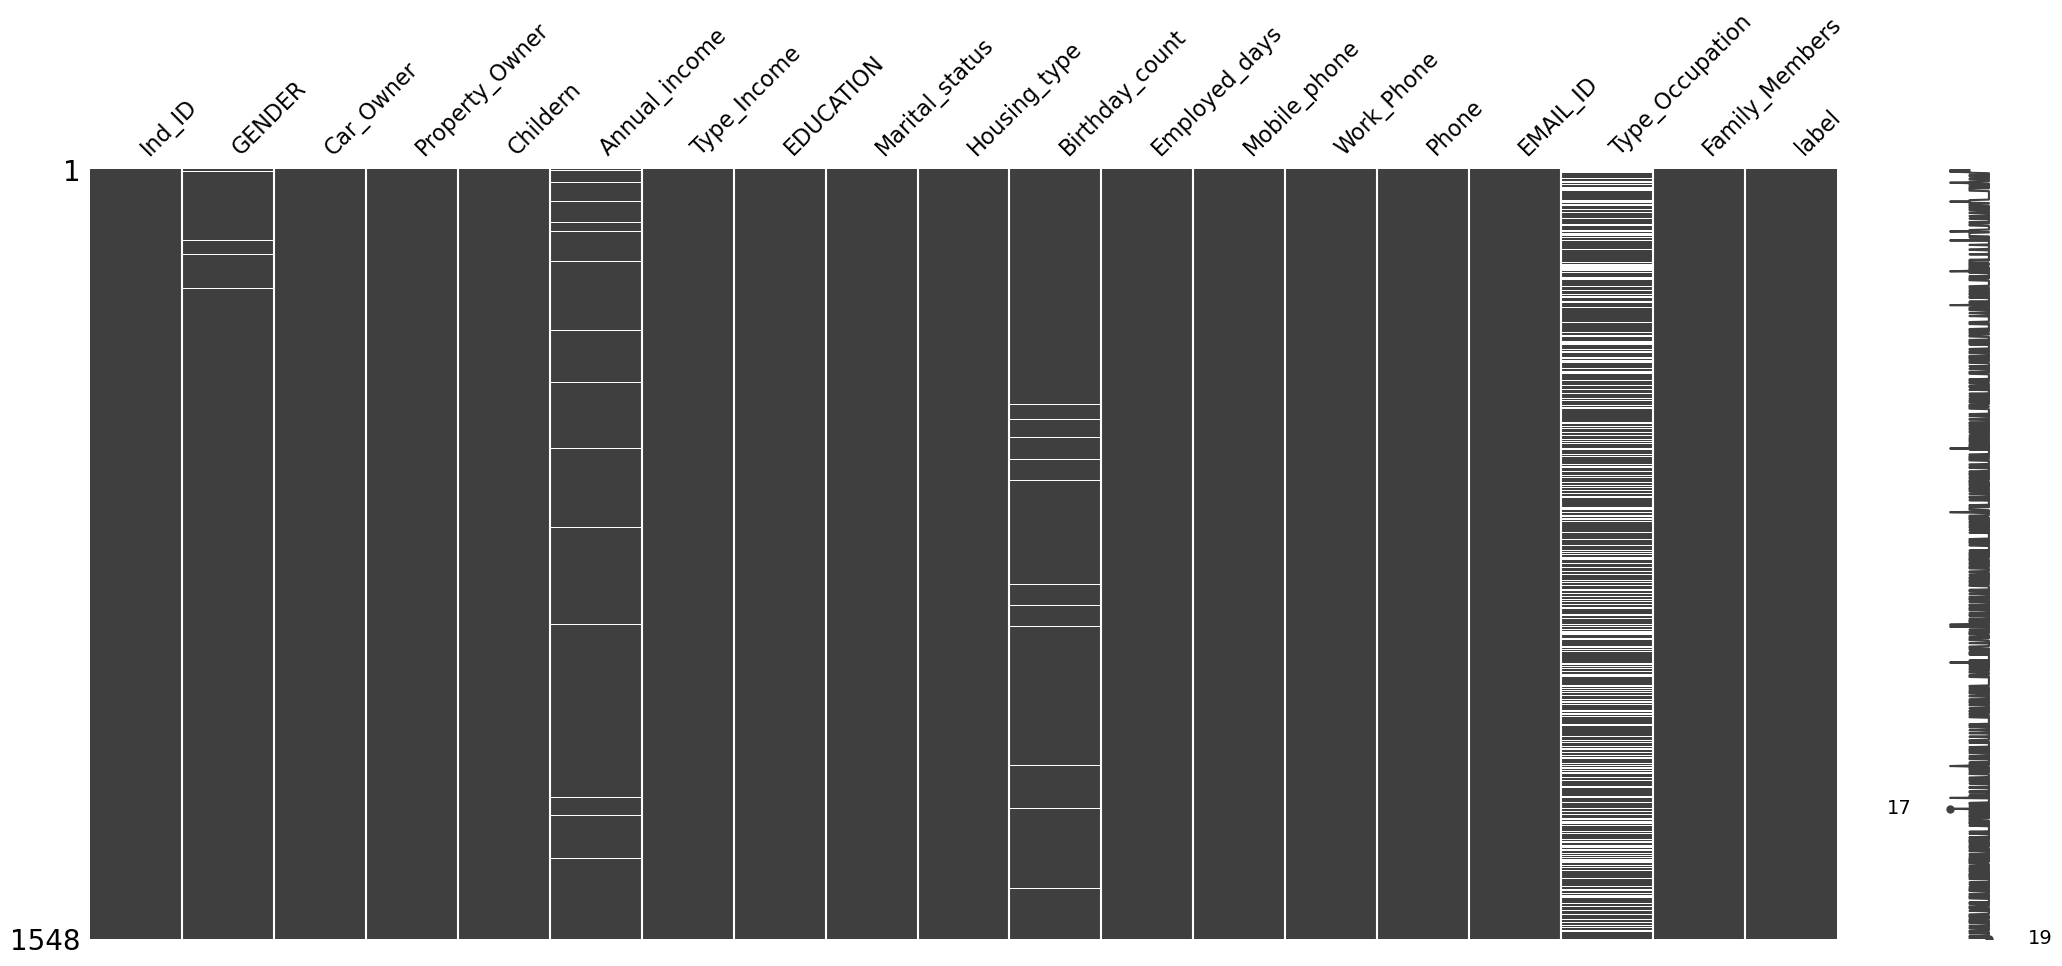%0A)

\## missing values having no relation between the features \##
Type_occupation having 31% missing values so imputation would be risky,
so going to eliminate this

#### KNN impution- would be the right choice for imputation.<a href="#KNN-impution--would-be-the-right-choice-for-imputation."
class="anchor-link">¶</a>

#### MICE impution - Can be used when missing values having relation between the features<a
href="#MICE-impution---Can-be-used-when-missing-values-having-relation-between-the-features"
class="anchor-link">¶</a>

In \[26\]:

    msno.heatmap(dataset)

Out\[26\]:

    <AxesSubplot:>

![](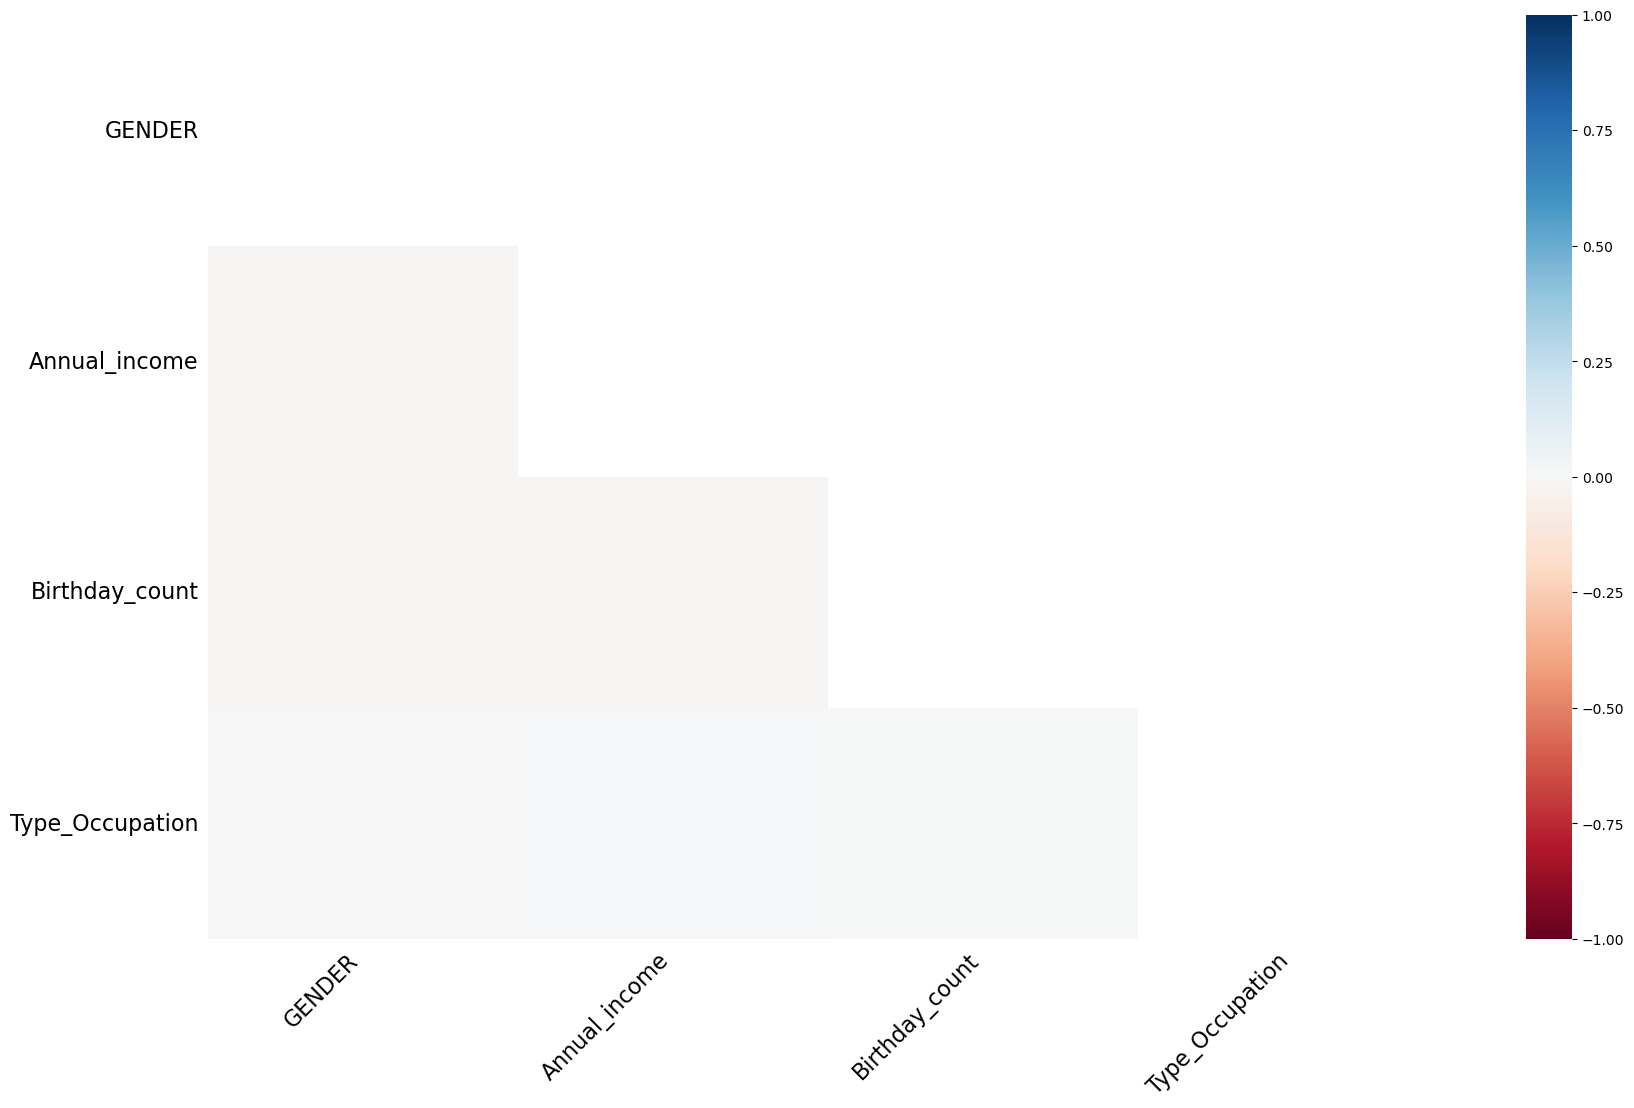%0A)

#### Appling Imputation on \[Age, Annual_income\] Features<a href="#Appling-Imputation-on---%5BAge,--Annual_income%5D--Features"
class="anchor-link">¶</a>

Data is "SKEWED" so mean or mode would not give right result form
imputation on numerical features

In \[27\]:

    dataset.head(1)

Out\[27\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|---------|--------|-----------|----------------|----------|---------------|-------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.0      | Pensioner   | Higher education | Married        | House / apartment | 18772.0        | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     |

In \[28\]:

    dataset.columns

Out\[28\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
           'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
           'label'],
          dtype='object')

In \[29\]:

    dataset.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1548 entries, 0 to 1547
    Data columns (total 19 columns):
     #   Column           Non-Null Count  Dtype  
    ---  ------           --------------  -----  
     0   Ind_ID           1548 non-null   int64  
     1   GENDER           1541 non-null   object 
     2   Car_Owner        1548 non-null   object 
     3   Property_Owner   1548 non-null   object 
     4   Childern         1548 non-null   int64  
     5   Annual_income    1525 non-null   float64
     6   Type_Income      1548 non-null   object 
     7   EDUCATION        1548 non-null   object 
     8   Marital_status   1548 non-null   object 
     9   Housing_type     1548 non-null   object 
     10  Birthday_count   1526 non-null   float64
     11  Employed_days    1548 non-null   int64  
     12  Mobile_phone     1548 non-null   int64  
     13  Work_Phone       1548 non-null   int64  
     14  Phone            1548 non-null   int64  
     15  EMAIL_ID         1548 non-null   int64  
     16  Type_Occupation  1060 non-null   object 
     17  Family_Members   1548 non-null   int64  
     18  label            1548 non-null   int64  
    dtypes: float64(2), int64(9), object(8)
    memory usage: 241.9+ KB

In \[30\]:

    from sklearn.impute import KNNImputer
    knn_imputer= KNNImputer()
    dataset['Birthday_count'] = knn_imputer.fit_transform(dataset[['Birthday_count']])
    dataset['Annual_income'] = knn_imputer.fit_transform(dataset[['Annual_income']])

In \[31\]:

    dataset['Birthday_count']

Out\[31\]:

    0       18772.000000
    1       13557.000000
    2       16040.342071
    3       13557.000000
    4       13557.000000
                ...     
    1543    11957.000000
    1544    10229.000000
    1545    13174.000000
    1546    15292.000000
    1547    16601.000000
    Name: Birthday_count, Length: 1548, dtype: float64

In \[32\]:

    dataset['Annual_income']

Out\[32\]:

    0       180000.00000
    1       315000.00000
    2       315000.00000
    3       191399.32623
    4       315000.00000
                ...     
    1543    191399.32623
    1544    225000.00000
    1545    180000.00000
    1546    270000.00000
    1547    225000.00000
    Name: Annual_income, Length: 1548, dtype: float64

In \[33\]:

    dataset[dataset['Birthday_count']== 'nan']

Out\[33\]:

|     | Ind_ID | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION | Marital_status | Housing_type | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label |
|-----|--------|--------|-----------|----------------|----------|---------------|-------------|-----------|----------------|--------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|

#### Converting the birthday_count to Age count<a href="#Converting-the-birthday_count-to-Age-count"
class="anchor-link">¶</a>

In \[34\]:

    ## Days count is present in Age feature so converting into year

    import numpy as np
    dataset['Birthday_age_count']=round(dataset['Birthday_count']/365)

In \[35\]:

    # converting Birthday_age_count feature from float to int64
    dataset['Birthday_age_count']=dataset['Birthday_age_count'].astype('int64')

In \[36\]:

    dataset.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1548 entries, 0 to 1547
    Data columns (total 20 columns):
     #   Column              Non-Null Count  Dtype  
    ---  ------              --------------  -----  
     0   Ind_ID              1548 non-null   int64  
     1   GENDER              1541 non-null   object 
     2   Car_Owner           1548 non-null   object 
     3   Property_Owner      1548 non-null   object 
     4   Childern            1548 non-null   int64  
     5   Annual_income       1548 non-null   float64
     6   Type_Income         1548 non-null   object 
     7   EDUCATION           1548 non-null   object 
     8   Marital_status      1548 non-null   object 
     9   Housing_type        1548 non-null   object 
     10  Birthday_count      1548 non-null   float64
     11  Employed_days       1548 non-null   int64  
     12  Mobile_phone        1548 non-null   int64  
     13  Work_Phone          1548 non-null   int64  
     14  Phone               1548 non-null   int64  
     15  EMAIL_ID            1548 non-null   int64  
     16  Type_Occupation     1060 non-null   object 
     17  Family_Members      1548 non-null   int64  
     18  label               1548 non-null   int64  
     19  Birthday_age_count  1548 non-null   int64  
    dtypes: float64(2), int64(10), object(8)
    memory usage: 254.0+ KB

In \[37\]:

    dataset.isnull().sum()/len(dataset)*100

Out\[37\]:

    Ind_ID                 0.000000
    GENDER                 0.452196
    Car_Owner              0.000000
    Property_Owner         0.000000
    Childern               0.000000
    Annual_income          0.000000
    Type_Income            0.000000
    EDUCATION              0.000000
    Marital_status         0.000000
    Housing_type           0.000000
    Birthday_count         0.000000
    Employed_days          0.000000
    Mobile_phone           0.000000
    Work_Phone             0.000000
    Phone                  0.000000
    EMAIL_ID               0.000000
    Type_Occupation       31.524548
    Family_Members         0.000000
    label                  0.000000
    Birthday_age_count     0.000000
    dtype: float64

#### Gender feature having 0.45% missing values so appling MODE imputation from SimpleImputer<a
href="#Gender-feature-having-0.45%25-missing-values-so-appling-MODE-imputation-from-SimpleImputer"
class="anchor-link">¶</a>

In \[38\]:

    from sklearn.impute import SimpleImputer
    sm=SimpleImputer(strategy='most_frequent')
    dataset[['GENDER']]= sm.fit_transform(dataset[['GENDER']])

In \[39\]:

    dataset.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1548 entries, 0 to 1547
    Data columns (total 20 columns):
     #   Column              Non-Null Count  Dtype  
    ---  ------              --------------  -----  
     0   Ind_ID              1548 non-null   int64  
     1   GENDER              1548 non-null   object 
     2   Car_Owner           1548 non-null   object 
     3   Property_Owner      1548 non-null   object 
     4   Childern            1548 non-null   int64  
     5   Annual_income       1548 non-null   float64
     6   Type_Income         1548 non-null   object 
     7   EDUCATION           1548 non-null   object 
     8   Marital_status      1548 non-null   object 
     9   Housing_type        1548 non-null   object 
     10  Birthday_count      1548 non-null   float64
     11  Employed_days       1548 non-null   int64  
     12  Mobile_phone        1548 non-null   int64  
     13  Work_Phone          1548 non-null   int64  
     14  Phone               1548 non-null   int64  
     15  EMAIL_ID            1548 non-null   int64  
     16  Type_Occupation     1060 non-null   object 
     17  Family_Members      1548 non-null   int64  
     18  label               1548 non-null   int64  
     19  Birthday_age_count  1548 non-null   int64  
    dtypes: float64(2), int64(10), object(8)
    memory usage: 254.0+ KB

## Checking Outliers and Skewness on Features<a href="#Checking-Outliers-and-Skewness-on-Features"
class="anchor-link">¶</a>

In \[40\]:

    dataset.skew()

    C:\Users\rjris\AppData\Local\Temp\ipykernel_12996\4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
      dataset.skew()

Out\[40\]:

    Ind_ID                0.072346
    Childern              4.631122
    Annual_income         3.953991
    Birthday_count        0.172313
    Employed_days         1.770964
    Mobile_phone          0.000000
    Work_Phone            1.440179
    Phone                 0.825309
    EMAIL_ID              2.818216
    Family_Members        2.232273
    label                 2.446379
    Birthday_age_count    0.169233
    dtype: float64

In \[41\]:

    dataset.describe(percentiles=[0.05,0.10,0.15,0.25,0.50,0.75,0.80,0.85,0.90,0.95])

Out\[41\]:

|       | Ind_ID       | Childern    | Annual_income | Birthday_count | Employed_days | Mobile_phone | Work_Phone  | Phone       | EMAIL_ID    | Family_Members | label       | Birthday_age_count |
|-------|--------------|-------------|---------------|----------------|---------------|--------------|-------------|-------------|-------------|----------------|-------------|--------------------|
| count | 1.548000e+03 | 1548.000000 | 1.548000e+03  | 1548.000000    | 1548.000000   | 1548.0       | 1548.000000 | 1548.000000 | 1548.000000 | 1548.000000    | 1548.000000 | 1548.000000        |
| mean  | 5.078920e+06 | 0.412791    | 1.913993e+05  | 16040.342071   | 59364.689922  | 1.0          | 0.208010    | 0.309432    | 0.092377    | 2.161499       | 0.113049    | 43.953488          |
| std   | 4.171759e+04 | 0.776691    | 1.124080e+05  | 4199.321477    | 137808.062701 | 0.0          | 0.406015    | 0.462409    | 0.289651    | 0.947772       | 0.316755    | 11.520496          |
| min   | 5.008827e+06 | 0.000000    | 3.375000e+04  | 7705.000000    | -14887.000000 | 1.0          | 0.000000    | 0.000000    | 0.000000    | 1.000000       | 0.000000    | 21.000000          |
| 5%    | 5.018504e+06 | 0.000000    | 7.650000e+04  | 9899.700000    | -7302.300000  | 1.0          | 0.000000    | 0.000000    | 0.000000    | 1.000000       | 0.000000    | 27.000000          |
| 10%   | 5.023643e+06 | 0.000000    | 9.000000e+04  | 10457.000000   | -5457.900000  | 1.0          | 0.000000    | 0.000000    | 0.000000    | 1.000000       | 0.000000    | 29.000000          |
| 15%   | 5.028685e+06 | 0.000000    | 1.125000e+05  | 11211.450000   | -4305.000000  | 1.0          | 0.000000    | 0.000000    | 0.000000    | 1.000000       | 0.000000    | 31.000000          |
| 25%   | 5.045070e+06 | 0.000000    | 1.215000e+05  | 12483.000000   | -3174.500000  | 1.0          | 0.000000    | 0.000000    | 0.000000    | 2.000000       | 0.000000    | 34.000000          |
| 50%   | 5.078842e+06 | 0.000000    | 1.710000e+05  | 15814.500000   | -1565.000000  | 1.0          | 0.000000    | 0.000000    | 0.000000    | 2.000000       | 0.000000    | 43.000000          |
| 75%   | 5.115673e+06 | 1.000000    | 2.250000e+05  | 19476.000000   | -431.750000   | 1.0          | 0.000000    | 1.000000    | 0.000000    | 3.000000       | 0.000000    | 53.000000          |
| 80%   | 5.118033e+06 | 1.000000    | 2.475000e+05  | 20317.400000   | -188.400000   | 1.0          | 1.000000    | 1.000000    | 0.000000    | 3.000000       | 0.000000    | 56.000000          |
| 85%   | 5.126518e+06 | 1.000000    | 2.700000e+05  | 21073.050000   | 365243.000000 | 1.0          | 1.000000    | 1.000000    | 0.000000    | 3.000000       | 0.000000    | 58.000000          |
| 90%   | 5.140036e+06 | 1.000000    | 3.150000e+05  | 22002.000000   | 365243.000000 | 1.0          | 1.000000    | 1.000000    | 0.000000    | 3.000000       | 1.000000    | 60.000000          |
| 95%   | 5.145965e+06 | 2.000000    | 3.600000e+05  | 23225.550000   | 365243.000000 | 1.0          | 1.000000    | 1.000000    | 1.000000    | 4.000000       | 1.000000    | 64.000000          |
| max   | 5.150412e+06 | 14.000000   | 1.575000e+06  | 24946.000000   | 365243.000000 | 1.0          | 1.000000    | 1.000000    | 1.000000    | 15.000000      | 1.000000    | 68.000000          |

In \[42\]:

    dataset.shape

Out\[42\]:

    (1548, 20)

In \[43\]:

    dataset.head(1)

Out\[43\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label | Birthday_age_count |
|-----|---------|--------|-----------|----------------|----------|---------------|-------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|--------------------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.0      | Pensioner   | Higher education | Married        | House / apartment | 18772.0        | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     | 51                 |

In \[44\]:

    from matplotlib.pyplot import figure
    import plotly.express as px

In \[45\]:

    dataset.head(3)

Out\[45\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label | Birthday_age_count |
|-----|---------|--------|-----------|----------------|----------|---------------|----------------------|------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|--------------------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.0      | Pensioner            | Higher education | Married        | House / apartment | 18772.000000   | 365243        | 1            | 0          | 0     | 0        | NaN             | 2              | 1     | 51                 |
| 1   | 5009744 | F      | Y         | N              | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | 13557.000000   | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     | 37                 |
| 2   | 5009746 | F      | Y         | N              | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | 16040.342071   | -586          | 1            | 1          | 1     | 0        | NaN             | 2              | 1     | 44                 |

\## "The data exhibits skewness in both numerical and categorical
features." : for catagorical features it can be handle in encoding : for
numerical features it can be handle by transformation

In \[46\]:

    import plotly.express as px
    from plotly.subplots import make_subplots

    # Create subplots
    fig = make_subplots(rows=1, cols=3, subplot_titles=('Children Box Plot', 'Annual Income Box Plot', 'Birthday Age Count Box Plot'))

    # Adding box plots to subplots
    fig.add_trace(px.box(dataset['Childern']).data[0], row=1, col=1)
    fig.add_trace(px.box(dataset['Annual_income']).data[0], row=1, col=2)
    fig.add_trace(px.box(dataset['Birthday_age_count']).data[0], row=1, col=3)

    # Updating size
    fig.update_layout(
        showlegend=False,
        height=400,  # Set the height
        width=900    # Set the width
    )

    # combined plot
    fig.show()

\# In children feature, this 14(count) is extreame value. \# In
Annual_income feature extreme value is present.

In \[47\]:

    import seaborn as sns
    import matplotlib.pyplot as plt

    # subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    sns.histplot(dataset['Annual_income'], kde=True, ax=axes[0])
    axes[0].set_title('Annual Income')

    sns.histplot(dataset['Birthday_age_count'], kde=True, ax=axes[1])
    axes[1].set_title('Birthday Age Count')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

![](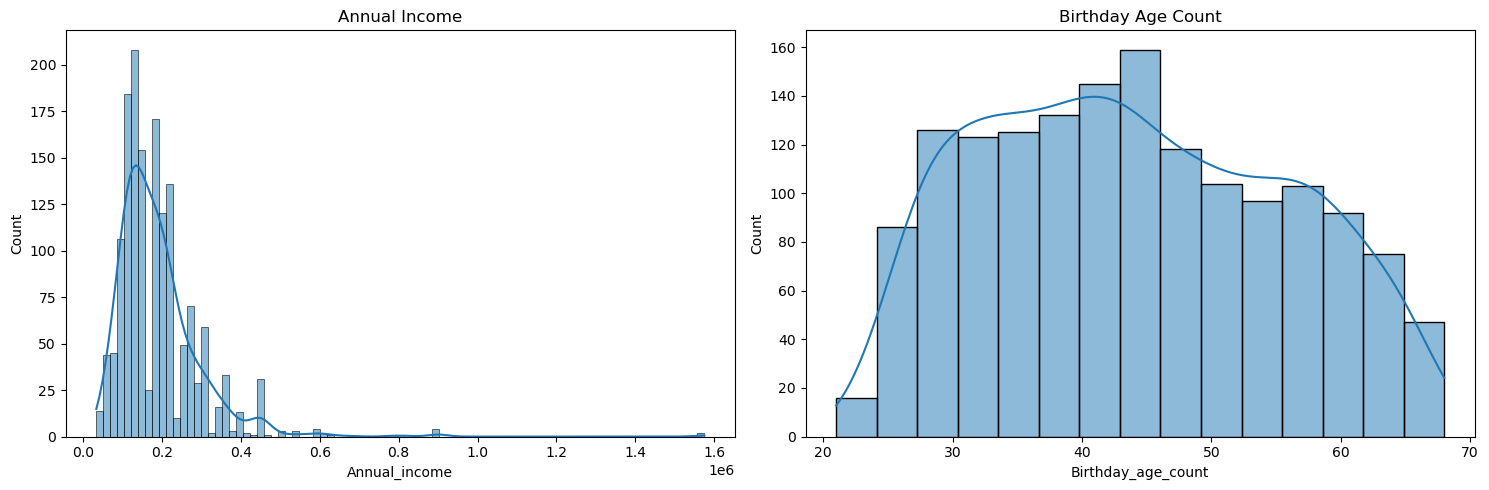%0A)

\## Age feature is normally distributed \## annual_income feature is
right skewed

## Dealing With Outliers<a href="#Dealing-With-Outliers" class="anchor-link">¶</a>

In Childern Feature 14 value is extreme so eleminating this \## so
deleting the 1 row

In \[48\]:

    dataset[dataset['Childern']==14]

Out\[48\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION                     | Marital_status | Housing_type      | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label | Birthday_age_count |
|-----|---------|--------|-----------|----------------|----------|---------------|-------------|-------------------------------|----------------|-------------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|--------------------|
| 565 | 5061207 | M      | Y         | Y              | 14       | 225000.0      | Working     | Secondary / secondary special | Separated      | House / apartment | 17754.0        | -1689         | 1            | 0          | 0     | 0        | Drivers         | 15             | 0     | 49                 |

In \[49\]:

    dataset.drop([565],inplace=True)

In \[50\]:

    dataset[dataset['Childern']==14]

Out\[50\]:

|     | Ind_ID | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION | Marital_status | Housing_type | Birthday_count | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label | Birthday_age_count |
|-----|--------|--------|-----------|----------------|----------|---------------|-------------|-----------|----------------|--------------|----------------|---------------|--------------|------------|-------|----------|-----------------|----------------|-------|--------------------|

In \[51\]:

    dataset.skew()

    C:\Users\rjris\AppData\Local\Temp\ipykernel_12996\4231230252.py:1: FutureWarning:

    Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

Out\[51\]:

    Ind_ID                0.071560
    Childern              1.660705
    Annual_income         3.953622
    Birthday_count        0.173034
    Employed_days         1.769927
    Mobile_phone          0.000000
    Work_Phone            1.439174
    Phone                 0.824296
    EMAIL_ID              2.816988
    Family_Members        0.781334
    label                 2.445229
    Birthday_age_count    0.170006
    dtype: float64

### Appling log Transformation on Annual_income, because of Right Skewed<a
href="#Appling-log-Transformation-on-Annual_income,-because-of-Right-Skewed"
class="anchor-link">¶</a>

In \[52\]:

    sns.histplot(dataset['Annual_income'],kde=True)

Out\[52\]:

    <AxesSubplot:xlabel='Annual_income', ylabel='Count'>

![](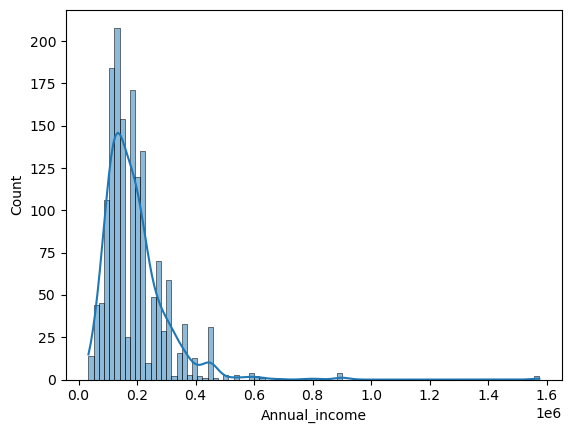%0A)

In \[53\]:

    import numpy as np
    dataset['log_Annual_income']=np.log(dataset['Annual_income'])

In \[54\]:

    sns.histplot(dataset['log_Annual_income'],kde=True)

Out\[54\]:

    <AxesSubplot:xlabel='log_Annual_income', ylabel='Count'>

![](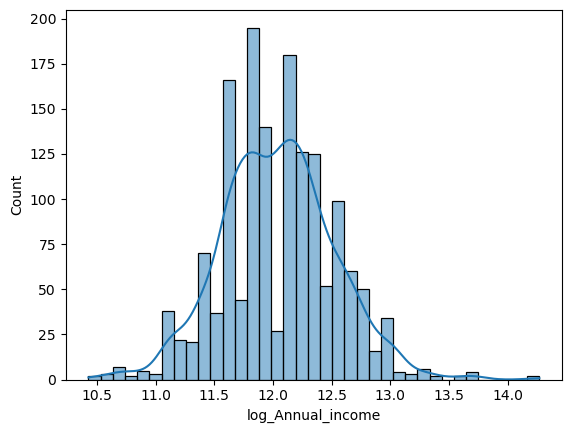%0A)

Now log_Annual_income Feature is Normal Distributed

In \[55\]:

    dataset.skew()

    C:\Users\rjris\AppData\Local\Temp\ipykernel_12996\4231230252.py:1: FutureWarning:

    Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

Out\[55\]:

    Ind_ID                0.071560
    Childern              1.660705
    Annual_income         3.953622
    Birthday_count        0.173034
    Employed_days         1.769927
    Mobile_phone          0.000000
    Work_Phone            1.439174
    Phone                 0.824296
    EMAIL_ID              2.816988
    Family_Members        0.781334
    label                 2.445229
    Birthday_age_count    0.170006
    log_Annual_income     0.192494
    dtype: float64

\## Employed_days: Start date of employment. Use backward count from
current day (0). Positive value means, individual is currently
unemployed. so extracting current employment status from Employed_days
feature \## -ve value = Employed \## +ve value = Unemployed

In \[56\]:

    dataset['Employement_status']=dataset['Employed_days'].apply(lambda x: 0 if  x>0 else 1 )

\#### 0 for Unemployed, 1 for Employed in the 'Employement_status'
feature

In \[57\]:

    dataset.head(5)

Out\[57\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | ... | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status |
|-----|---------|--------|-----------|----------------|----------|---------------|----------------------|------------------|----------------|-------------------|-----|--------------|------------|-------|----------|-----------------|----------------|-------|--------------------|-------------------|--------------------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.00000  | Pensioner            | Higher education | Married        | House / apartment | ... | 1            | 0          | 0     | 0        | NaN             | 2              | 1     | 51                 | 12.100712         | 0                  |
| 1   | 5009744 | F      | Y         | N              | 0        | 315000.00000  | Commercial associate | Higher education | Married        | House / apartment | ... | 1            | 1          | 1     | 0        | NaN             | 2              | 1     | 37                 | 12.660328         | 1                  |
| 2   | 5009746 | F      | Y         | N              | 0        | 315000.00000  | Commercial associate | Higher education | Married        | House / apartment | ... | 1            | 1          | 1     | 0        | NaN             | 2              | 1     | 44                 | 12.660328         | 1                  |
| 3   | 5009749 | F      | Y         | N              | 0        | 191399.32623  | Commercial associate | Higher education | Married        | House / apartment | ... | 1            | 1          | 1     | 0        | NaN             | 2              | 1     | 37                 | 12.162117         | 1                  |
| 4   | 5009752 | F      | Y         | N              | 0        | 315000.00000  | Commercial associate | Higher education | Married        | House / apartment | ... | 1            | 1          | 1     | 0        | NaN             | 2              | 1     | 37                 | 12.660328         | 1                  |

5 rows × 22 columns

In \[58\]:

    dataset.columns

Out\[58\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
           'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
           'label', 'Birthday_age_count', 'log_Annual_income',
           'Employement_status'],
          dtype='object')

In \[59\]:

    dataset[dataset['Birthday_count']=='NaN']

Out\[59\]:

|     | Ind_ID | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income | EDUCATION | Marital_status | Housing_type | ... | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Type_Occupation | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status |
|-----|--------|--------|-----------|----------------|----------|---------------|-------------|-----------|----------------|--------------|-----|--------------|------------|-------|----------|-----------------|----------------|-------|--------------------|-------------------|--------------------|

0 rows × 22 columns

In \[60\]:

    dataset.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1547 entries, 0 to 1547
    Data columns (total 22 columns):
     #   Column              Non-Null Count  Dtype  
    ---  ------              --------------  -----  
     0   Ind_ID              1547 non-null   int64  
     1   GENDER              1547 non-null   object 
     2   Car_Owner           1547 non-null   object 
     3   Property_Owner      1547 non-null   object 
     4   Childern            1547 non-null   int64  
     5   Annual_income       1547 non-null   float64
     6   Type_Income         1547 non-null   object 
     7   EDUCATION           1547 non-null   object 
     8   Marital_status      1547 non-null   object 
     9   Housing_type        1547 non-null   object 
     10  Birthday_count      1547 non-null   float64
     11  Employed_days       1547 non-null   int64  
     12  Mobile_phone        1547 non-null   int64  
     13  Work_Phone          1547 non-null   int64  
     14  Phone               1547 non-null   int64  
     15  EMAIL_ID            1547 non-null   int64  
     16  Type_Occupation     1059 non-null   object 
     17  Family_Members      1547 non-null   int64  
     18  label               1547 non-null   int64  
     19  Birthday_age_count  1547 non-null   int64  
     20  log_Annual_income   1547 non-null   float64
     21  Employement_status  1547 non-null   int64  
    dtypes: float64(3), int64(11), object(8)
    memory usage: 278.0+ KB

### Eleminating few Features which is not Required<a href="#Eleminating-few-Features-which-is-not-Required"
class="anchor-link">¶</a>

In \[61\]:

    dataset.isnull().sum()/len(dataset)*100

Out\[61\]:

    Ind_ID                 0.000000
    GENDER                 0.000000
    Car_Owner              0.000000
    Property_Owner         0.000000
    Childern               0.000000
    Annual_income          0.000000
    Type_Income            0.000000
    EDUCATION              0.000000
    Marital_status         0.000000
    Housing_type           0.000000
    Birthday_count         0.000000
    Employed_days          0.000000
    Mobile_phone           0.000000
    Work_Phone             0.000000
    Phone                  0.000000
    EMAIL_ID               0.000000
    Type_Occupation       31.544926
    Family_Members         0.000000
    label                  0.000000
    Birthday_age_count     0.000000
    log_Annual_income      0.000000
    Employement_status     0.000000
    dtype: float64

\## Type_Occupation having 31.5 % missing values, imputation of 31% data
might be impact on accuracy of model.

In \[62\]:

    dataset.drop(columns=['Type_Occupation'],inplace=True)

In \[63\]:

    dataset.columns

Out\[63\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
           'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label',
           'Birthday_age_count', 'log_Annual_income', 'Employement_status'],
          dtype='object')

In \[64\]:

    dataset.head()

Out\[64\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | ... | Employed_days | Mobile_phone | Work_Phone | Phone | EMAIL_ID | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status |
|-----|---------|--------|-----------|----------------|----------|---------------|----------------------|------------------|----------------|-------------------|-----|---------------|--------------|------------|-------|----------|----------------|-------|--------------------|-------------------|--------------------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.00000  | Pensioner            | Higher education | Married        | House / apartment | ... | 365243        | 1            | 0          | 0     | 0        | 2              | 1     | 51                 | 12.100712         | 0                  |
| 1   | 5009744 | F      | Y         | N              | 0        | 315000.00000  | Commercial associate | Higher education | Married        | House / apartment | ... | -586          | 1            | 1          | 1     | 0        | 2              | 1     | 37                 | 12.660328         | 1                  |
| 2   | 5009746 | F      | Y         | N              | 0        | 315000.00000  | Commercial associate | Higher education | Married        | House / apartment | ... | -586          | 1            | 1          | 1     | 0        | 2              | 1     | 44                 | 12.660328         | 1                  |
| 3   | 5009749 | F      | Y         | N              | 0        | 191399.32623  | Commercial associate | Higher education | Married        | House / apartment | ... | -586          | 1            | 1          | 1     | 0        | 2              | 1     | 37                 | 12.162117         | 1                  |
| 4   | 5009752 | F      | Y         | N              | 0        | 315000.00000  | Commercial associate | Higher education | Married        | House / apartment | ... | -586          | 1            | 1          | 1     | 0        | 2              | 1     | 37                 | 12.660328         | 1                  |

5 rows × 21 columns

In \[ \]:

     

#### 'Mobile_phone','Work_Phone','Ind_ID', 'Phone', 'EMAIL_ID' this is not required on ml<a
href="#&#39;Mobile_phone&#39;,&#39;Work_Phone&#39;,&#39;Ind_ID&#39;,-&#39;Phone&#39;,-&#39;EMAIL_ID&#39;-this-is-not-required-on-ml"
class="anchor-link">¶</a>

In \[65\]:

     dataset.drop(columns=['Mobile_phone','Work_Phone', 'Phone', 'EMAIL_ID'],inplace=True)

In \[66\]:

    # cleaned dataset for sql 
    dataset_for_sql= dataset.copy()
    dataset_for_sql.drop(columns=['Employed_days','log_Annual_income','Birthday_count'],inplace=True)
    dataset_for_sql.shape

Out\[66\]:

    (1547, 14)

In \[67\]:

    dataset_for_sql.isnull().sum()

Out\[67\]:

    Ind_ID                0
    GENDER                0
    Car_Owner             0
    Property_Owner        0
    Childern              0
    Annual_income         0
    Type_Income           0
    EDUCATION             0
    Marital_status        0
    Housing_type          0
    Family_Members        0
    label                 0
    Birthday_age_count    0
    Employement_status    0
    dtype: int64

In \[68\]:

    dataset.drop(columns=['Birthday_count','Annual_income','Ind_ID','Employed_days'],inplace=True)
    dataset.shape

Out\[68\]:

    (1547, 13)

In \[69\]:

    dataset.isnull().sum()

Out\[69\]:

    GENDER                0
    Car_Owner             0
    Property_Owner        0
    Childern              0
    Type_Income           0
    EDUCATION             0
    Marital_status        0
    Housing_type          0
    Family_Members        0
    label                 0
    Birthday_age_count    0
    log_Annual_income     0
    Employement_status    0
    dtype: int64

In \[70\]:

    dataset.sample(5)

Out\[70\]:

|      | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION                     | Marital_status       | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status |
|------|--------|-----------|----------------|----------|----------------------|-------------------------------|----------------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|
| 1247 | F      | N         | Y              | 0        | Commercial associate | Secondary / secondary special | Married              | House / apartment | 2              | 0     | 56                 | 12.522707         | 1                  |
| 901  | M      | Y         | N              | 0        | Working              | Secondary / secondary special | Married              | House / apartment | 2              | 0     | 48                 | 11.302204         | 1                  |
| 1448 | M      | Y         | N              | 1        | Working              | Higher education              | Married              | House / apartment | 3              | 0     | 25                 | 12.419166         | 1                  |
| 1109 | M      | Y         | Y              | 1        | Working              | Secondary / secondary special | Married              | House / apartment | 3              | 0     | 28                 | 12.218495         | 1                  |
| 84   | F      | Y         | Y              | 0        | Commercial associate | Higher education              | Single / not married | House / apartment | 2              | 1     | 31                 | 12.454884         | 1                  |

### Univariate Analysis to know about the Frequency of the Feature<a
href="#Univariate-Analysis-to-know-about-the-Frequency-of-the-Feature"
class="anchor-link">¶</a>

#### Univariate (Analysis on single column)<a href="#Univariate-(Analysis-on-single-column)"
class="anchor-link">¶</a>

In \[71\]:

    dataset.shape

Out\[71\]:

    (1547, 13)

### Using count plot for catagorical columns analysis<a href="#Using-count-plot-for-catagorical-columns-analysis"
class="anchor-link">¶</a>

In \[72\]:

    # List of categorical columns
    categorical_cols = ['GENDER', 'Car_Owner', 'Property_Owner', 'Childern', 'Type_Income', 
                        'EDUCATION', 'Marital_status', 'Housing_type', 'Family_Members', 
                        'label', 'Employement_status']

    # Custom color palette
    custom_palette = sns.color_palette("Set2", len(categorical_cols))

    # Create subplots
    num_plots = len(categorical_cols)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots - 1) // num_cols + 1  # Number of rows for subplots

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
    fig.subplots_adjust(wspace=1, hspace=1.1)  # Adjust spacing

    # Iterate through each column and create a countplot
    for i, column in enumerate(categorical_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        sns.countplot(data=dataset_for_sql, x=column, palette=[custom_palette[i]], ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f'Countplot of {column}')
        axes[row_idx, col_idx].set_xlabel(column)
        axes[row_idx, col_idx].set_ylabel('Frequency')
        axes[row_idx, col_idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

    # Hide any empty subplots
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.show()

![](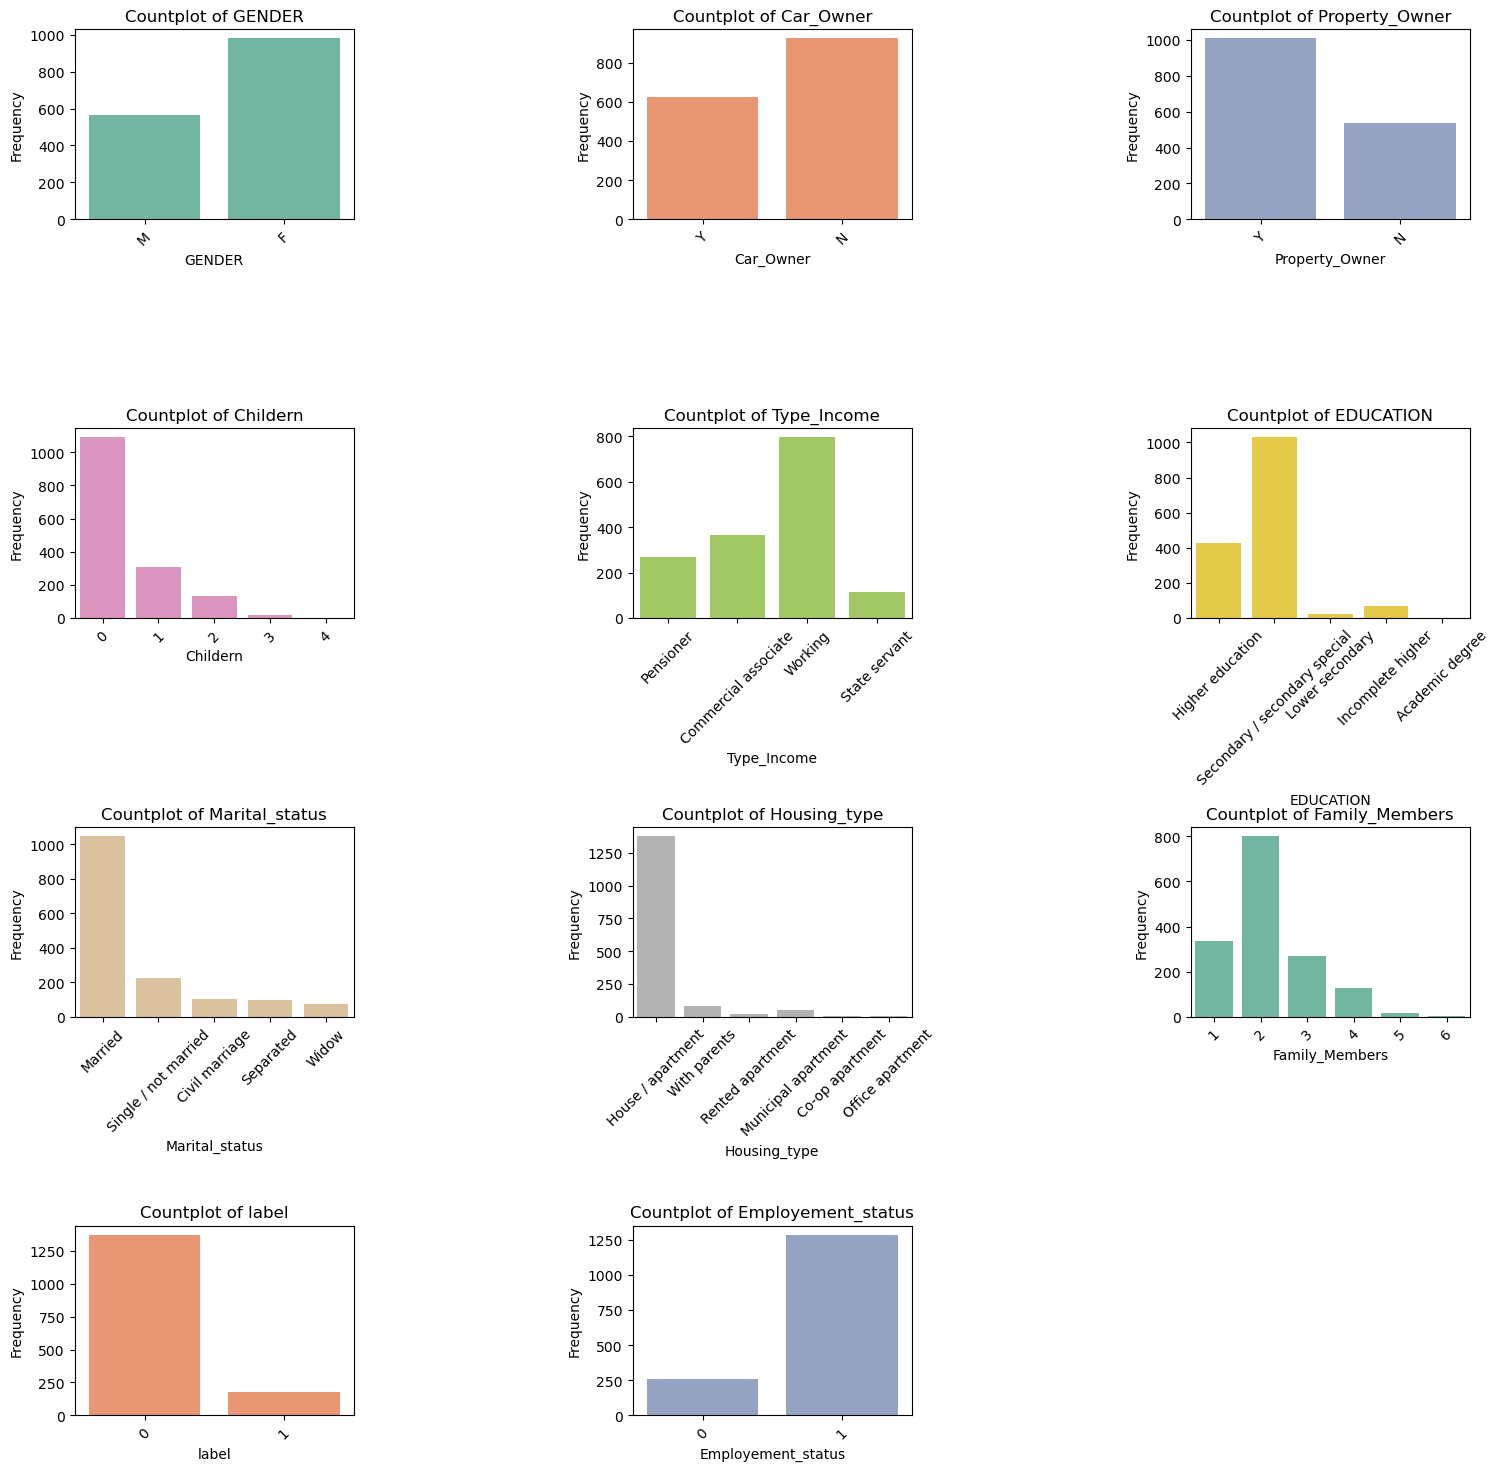%0A)

### Below are the Observation from Univariate Analysis ::<a href="#Below-are-the-Observation-from--Univariate-Analysis-::"
class="anchor-link">¶</a>

\# In "gender" feature 'female' having high frequency \# In "car_owner"
feature 'no car' having high frequency \# In "property_owner" feature
'yes' having high frequency \# In "children" feature 'no_child' having
high frequency \# In "income_type" feature 'working' having high
frequency \# In "education" feature 'secondary/secondary special' having
high frequency \# In "material_status" feature 'married' having high
frequency \# In "housing_type" feature 'house/apartment' having high
frequency \# In "family_man" feature '2-dependencies' having high
frequency \# In "employment_status" feature '1' having high frequency
\[0-unemployment, 1- employment\] \# In "Birthday_age_count" having
feature high frequency in between (40 -50 age group)

## Bivariate Analysis:<a href="#Bivariate-Analysis:" class="anchor-link">¶</a>

In \[73\]:

    dataset_for_sql.columns

Out\[73\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Family_Members', 'label', 'Birthday_age_count',
           'Employement_status'],
          dtype='object')

### Using barplot for continious feature to catagorical feature (target feature)<a
href="#Using-barplot-for-continious-feature-to-catagorical-feature-(target-feature)"
class="anchor-link">¶</a>

In \[74\]:

    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd

    # Create age intervals (customize as needed)
    age_intervals = pd.cut(dataset_for_sql['Birthday_age_count'], bins=[0, 25, 35, 45, 55, float('inf')],
                           labels=['<25', '25-35', '35-45', '45-55', '55+'])

    # Create income intervals (customize as needed)
    income_intervals = pd.cut(dataset_for_sql['Annual_income'], bins=[0, 30000, 50000, 70000, 100000, float('inf')],
                              labels=['<30k', '30-50k', '50-70k', '70-100k', '100k+'])

    # Add the age and income intervals as new columns in the DataFrame
    dataset_for_sql['Age_Group'] = age_intervals
    dataset_for_sql['Income_Group'] = income_intervals

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.subplots_adjust(wspace=0.4)

    # Plot for Age Group
    ax1 = sns.countplot(data=dataset_for_sql, x='Age_Group', hue='label', palette='Set2', ax=axes[0])
    ax1.set_xlabel('Age Group')
    ax1.set_ylabel('Count')
    ax1.set_title('Count of Approvals and Rejections by Age Group')

    # Calculate percentages and annotate the bars for Age Group
    total_counts_age = len(dataset_for_sql)
    for p in ax1.patches:
        height = p.get_height()
        ax1.annotate(f'{100 * height / total_counts_age:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    # Plot for Income Group
    ax2 = sns.countplot(data=dataset_for_sql, x='Income_Group', hue='label', palette='Set2', ax=axes[1])
    ax2.set_xlabel('Income Group')
    ax2.set_ylabel('Count')
    ax2.set_title('Count of Approvals and Rejections by Income Group')

    # Calculate percentages and annotate the bars for Income Group
    total_counts_income = len(dataset_for_sql)
    for p in ax2.patches:
        height = p.get_height()
        ax2.annotate(f'{100 * height / total_counts_income:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    # Show the plots
    plt.show()

![](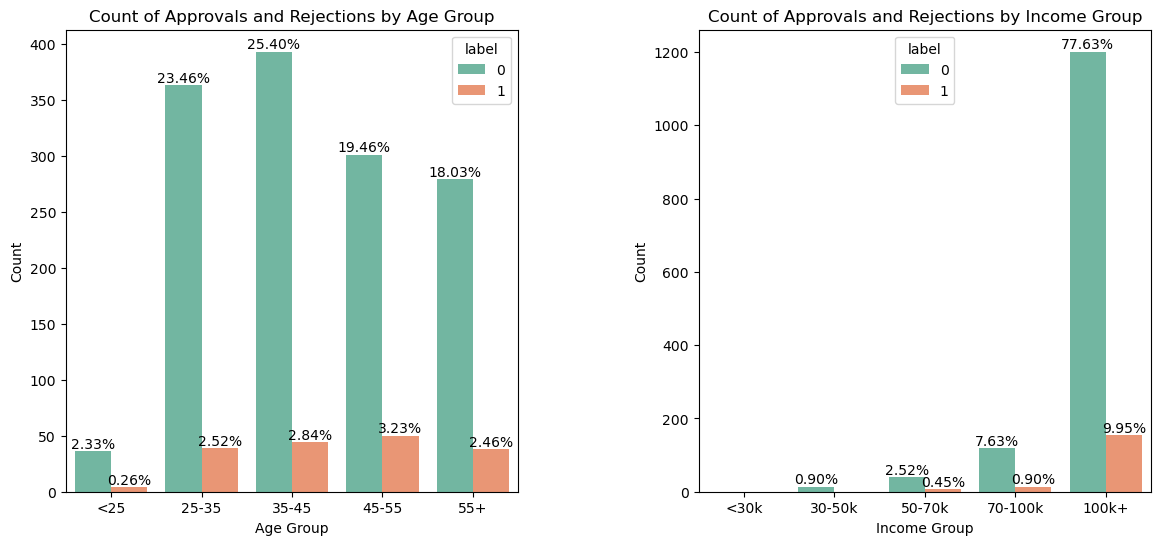%0A)

In \[75\]:

    dataset_for_sql['Annual_income'].max()

Out\[75\]:

    1575000.0

### Using barplot for catagorical feature to (target feature)<a href="#Using-barplot-for-catagorical-feature-to--(target-feature)"
class="anchor-link">¶</a>

In \[76\]:

    dataset_for_sql.columns

Out\[76\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Family_Members', 'label', 'Birthday_age_count',
           'Employement_status', 'Age_Group', 'Income_Group'],
          dtype='object')

In \[77\]:

    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import ipywidgets as widgets
    from IPython.display import display, clear_output

    # List of categorical columns for bivariate analysis
    cat_cols_bivariate_analysis = ['GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
                                   'Type_Income', 'EDUCATION', 'Marital_status',
                                   'Housing_type', 'Family_Members', 'Employement_status']

    # Specify the 'label' column
    credit_label = 'label'

    # Create a Dropdown widget for selecting a column
    column_dropdown = widgets.Dropdown(
        options=cat_cols_bivariate_analysis,
        description='Select a Column:',
    )

    # Create an Output widget to display the plot
    plot_output = widgets.Output()

    # Function to update the plot based on the selected column
    def update_plot(selected_column):
        with plot_output:
            clear_output(wait=True)
            plt.figure(figsize=(8, 6))
            ax = sns.countplot(data=dataset_for_sql, x=selected_column, hue=credit_label, palette='Set2')
            plt.title(f'{selected_column} vs. {credit_label}')
            plt.xlabel(selected_column)
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            
            # Add percentage labels to the bars
            total = len(dataset_for_sql)
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{100 * height / total:.1f}%', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom')
            
            plt.show()

    # Event handler for the Dropdown widget
    def on_dropdown_change(change):
        selected_column = change.new
        update_plot(selected_column)

    column_dropdown.observe(on_dropdown_change, names='value')

    # Display the widgets
    display(column_dropdown)
    display(plot_output)

    Dropdown(description='Select a Column:', options=('GENDER', 'Car_Owner', 'Property_Owner', 'Childern', 'Type_I…

    Output()

### Insights and Recommandation:<a href="#Insights-and-Recommandation:" class="anchor-link">¶</a>

#### Insights on Gender:<a href="#Insights-on-Gender:" class="anchor-link">¶</a>

Female haivng high approval rate means credit score is high.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

consider to ask better offer to female customers.

#### Insights on car_owner:<a href="#Insights-on-car_owner:" class="anchor-link">¶</a>

Approval rate is high who doesnot own car, credit score is high.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

customer have no own car can ask for more offers, approval rate is high.

#### Insights on property_owner:<a href="#Insights-on-property_owner:" class="anchor-link">¶</a>

Approval rate is almost double who having own house.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

so we can ask for better rates and offers to them.

#### Insights on No_of children:<a href="#Insights-on-No_of-children:" class="anchor-link">¶</a>

High approval rate who having 0 childern, they might be depend on
parents or single so marital status matters on this also.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

so we can consider good customer who having 0 or 1 children.

#### Insights on Income_type:<a href="#Insights-on-Income_type:" class="anchor-link">¶</a>

working class and state servant having good credit score rate.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

we can consider both for more credit worthy

#### Insights on education:<a href="#Insights-on-education:" class="anchor-link">¶</a>

higher level and secondary special having high approval rate.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

for approval we can consider both education level for credit worthyness.

#### Insights on marital_status:<a href="#Insights-on-marital_status:" class="anchor-link">¶</a>

Married, single, civil marriage having high credit worthy for approval.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

we can consider for this 3 catagory on marital status.

#### Insights on housing_type:<a href="#Insights-on-housing_type:" class="anchor-link">¶</a>

who having own house and living with parents having high approval rate.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

we can consider this 2 catagory for more worthy for credit card.

#### Insights on family_member:<a href="#Insights-on-family_member:" class="anchor-link">¶</a>

single & married with no kids having high credit score.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

but we can consider upto 4 member for credit approval.

#### Insights on employment_status:<a href="#Insights-on-employment_status:" class="anchor-link">¶</a>

more credit worthy who have job.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

high risk on who having no job.

#### Insights on age:<a href="#Insights-on-age:" class="anchor-link">¶</a>

below 25 and 55+ risk is high for approval.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

we can consider minimum age for approval is 25 and max is \>55.

#### Insights on Annual_income:<a href="#Insights-on-Annual_income:" class="anchor-link">¶</a>

In this dataset customer with income of 70k to 100k+ having good credit
history.

#### Recommandation:<a href="#Recommandation:" class="anchor-link">¶</a>

consider to offer best and less interest rates to these income groups.

In \[78\]:

    dataset.columns

Out\[78\]:

    Index(['GENDER', 'Car_Owner', 'Property_Owner', 'Childern', 'Type_Income',
           'EDUCATION', 'Marital_status', 'Housing_type', 'Family_Members',
           'label', 'Birthday_age_count', 'log_Annual_income',
           'Employement_status'],
          dtype='object')

### Feature's Encoding<a href="#Feature&#39;s-Encoding" class="anchor-link">¶</a>

#### Appling Dummy_encoding on Gender<a href="#Appling-Dummy_encoding-on-Gender" class="anchor-link">¶</a>

In \[79\]:

    dataset.head(2)

Out\[79\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 12.660328         | 1                  |

In \[80\]:

    dummy_gender= pd.get_dummies(dataset['GENDER'],drop_first=True)
    dataset =pd.concat([dataset,dummy_gender],axis=1)
    # dataset.drop(columns=['F','M'],inplace=True)
    dataset.head(2)

Out\[80\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status | M   |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|-----|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  | 1   |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 12.660328         | 1                  | 0   |

#### Appling Dummy_encoding on Car_owner<a href="#Appling-Dummy_encoding-on-Car_owner" class="anchor-link">¶</a>

In \[81\]:

    dummy_car_owner= pd.get_dummies(dataset['Car_Owner'],drop_first=True)
    dataset =pd.concat([dataset,dummy_car_owner],axis=1)
    dataset.head(2)

Out\[81\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status | M   | Y   |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|-----|-----|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  | 1   | 1   |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 12.660328         | 1                  | 0   | 1   |

In \[82\]:

    ## Renaming "M" & "Y" feature
    dataset.rename(columns={'M':'gender_status','Y':'car_owner_type'},inplace =True)

In \[83\]:

    dataset_copy = dataset.copy()

#### Appling Dummy Encoding on Property_Owner column.<a href="#Appling-Dummy-Encoding-on-Property_Owner-column."
class="anchor-link">¶</a>

In \[84\]:

    dummy_Property_Owner1 = pd.get_dummies(dataset['Property_Owner'],drop_first=True)
    dummy_Property_Owner1.head(2)

Out\[84\]:

|     | Y   |
|-----|-----|
| 0   | 1   |
| 1   | 0   |

In \[85\]:

    dataset =pd.concat([dataset,dummy_Property_Owner1],axis=1)
    dataset.head(2)

Out\[85\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Y   |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|---------------|----------------|-----|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  | 1             | 1              | 1   |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 12.660328         | 1                  | 0             | 1              | 0   |

In \[86\]:

    # Renaming the feature 'Y' to 'Property_Owner_status'
    dataset.rename(columns={'Y':'Property_Owner_status'},inplace =True)

In \[87\]:

    dataset.head(2)

Out\[87\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  | 1             | 1              | 1                     |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 12.660328         | 1                  | 0             | 1              | 0                     |

#### Appling Dummy Encoding on Type_Income column.<a href="#Appling-Dummy-Encoding-on-Type_Income-column."
class="anchor-link">¶</a>

In \[88\]:

    dummy_Type_Income = pd.get_dummies(dataset['Type_Income'],drop_first=True)
    dummy_Type_Income.head(2)

Out\[88\]:

|     | Pensioner | State servant | Working |
|-----|-----------|---------------|---------|
| 0   | 1         | 0             | 0       |
| 1   | 0         | 0             | 0       |

In \[89\]:

    dataset= pd.concat([dataset,dummy_Type_Income],axis=1)

In \[90\]:

    dataset.head(2)

Out\[90\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | Working |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|---------|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  | 1             | 1              | 1                     | 1         | 0             | 0       |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 12.660328         | 1                  | 0             | 1              | 0                     | 0         | 0             | 0       |

#### Appling Ordinal Encoding on Education Feature<a href="#Appling-Ordinal-Encoding-on-Education-Feature"
class="anchor-link">¶</a>

In \[91\]:

    dataset['Education'] = final_credit_card['EDUCATION'].map({'Higher education':4,'Secondary / secondary special':5,'Lower secondary':3,'Incomplete higher':2,'Academic degree':1})

In \[92\]:

    dataset.head(2)

Out\[92\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | Working | Education |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|---------|-----------|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  | 1             | 1              | 1                     | 1         | 0             | 0       | 4         |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 12.660328         | 1                  | 0             | 1              | 0                     | 0         | 0             | 0       | 4         |

#### Appling Dummy Encoding on 'Marital_status' column<a href="#Appling-Dummy-Encoding-on-&#39;Marital_status&#39;-column"
class="anchor-link">¶</a>

In \[93\]:

    dummy_Marital_status=pd.get_dummies(dataset['Marital_status'],drop_first= True)
    dummy_Marital_status.head(1)

Out\[93\]:

|     | Married | Separated | Single / not married | Widow |
|-----|---------|-----------|----------------------|-------|
| 0   | 1       | 0         | 0                    | 0     |

In \[94\]:

    dataset=pd.concat([dataset,dummy_Marital_status],axis=1)
    dataset.head(2)

Out\[94\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | ... | car_owner_type | Property_Owner_status | Pensioner | State servant | Working | Education | Married | Separated | Single / not married | Widow |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|-----|----------------|-----------------------|-----------|---------------|---------|-----------|---------|-----------|----------------------|-------|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | ... | 1              | 1                     | 1         | 0             | 0       | 4         | 1       | 0         | 0                    | 0     |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | ... | 1              | 0                     | 0         | 0             | 0       | 4         | 1       | 0         | 0                    | 0     |

2 rows × 24 columns

#### Appling dummy encoding on Housing_type column<a href="#Appling-dummy-encoding-on-Housing_type-column"
class="anchor-link">¶</a>

In \[95\]:

    dummy_housing_type=pd.get_dummies(dataset['Housing_type'],drop_first=True)
    dummy_housing_type.head(1)

Out\[95\]:

|     | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|-----|-------------------|---------------------|------------------|------------------|--------------|
| 0   | 1                 | 0                   | 0                | 0                | 0            |

In \[96\]:

    dataset =pd.concat([dataset,dummy_housing_type],axis=1)

In \[97\]:

    dataset.head(2)

Out\[97\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|-----|--------|-----------|----------------|----------|----------------------|------------------|----------------|-------------------|----------------|-------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 0   | M      | Y         | Y              | 0        | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | ... | 4         | 1       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |
| 1   | F      | Y         | N              | 0        | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | ... | 4         | 1       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |

2 rows × 29 columns

### Eleminating columns which having string values(Encoding done)<a href="#Eleminating-columns-which-having-string-values(Encoding-done)"
class="anchor-link">¶</a>

In \[98\]:

    dataset.drop(columns=['Property_Owner','Car_Owner','Type_Income','Marital_status','Housing_type','EDUCATION','GENDER',],inplace=True)

In \[99\]:

    dataset.shape

Out\[99\]:

    (1547, 22)

In \[100\]:

    dataset.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1547 entries, 0 to 1547
    Data columns (total 22 columns):
     #   Column                 Non-Null Count  Dtype  
    ---  ------                 --------------  -----  
     0   Childern               1547 non-null   int64  
     1   Family_Members         1547 non-null   int64  
     2   label                  1547 non-null   int64  
     3   Birthday_age_count     1547 non-null   int64  
     4   log_Annual_income      1547 non-null   float64
     5   Employement_status     1547 non-null   int64  
     6   gender_status          1547 non-null   uint8  
     7   car_owner_type         1547 non-null   uint8  
     8   Property_Owner_status  1547 non-null   uint8  
     9   Pensioner              1547 non-null   uint8  
     10  State servant          1547 non-null   uint8  
     11  Working                1547 non-null   uint8  
     12  Education              1547 non-null   int64  
     13  Married                1547 non-null   uint8  
     14  Separated              1547 non-null   uint8  
     15  Single / not married   1547 non-null   uint8  
     16  Widow                  1547 non-null   uint8  
     17  House / apartment      1547 non-null   uint8  
     18  Municipal apartment    1547 non-null   uint8  
     19  Office apartment       1547 non-null   uint8  
     20  Rented apartment       1547 non-null   uint8  
     21  With parents           1547 non-null   uint8  
    dtypes: float64(1), int64(6), uint8(15)
    memory usage: 119.3 KB

## Spliting the Data Into x,y and then Train & Test<a href="#Spliting-the-Data-Into-x,y-and-then-Train-&amp;-Test"
class="anchor-link">¶</a>

In \[101\]:

    y=dataset['label']
    y

Out\[101\]:

    0       1
    1       1
    2       1
    3       1
    4       1
           ..
    1543    0
    1544    0
    1545    0
    1546    0
    1547    0
    Name: label, Length: 1547, dtype: int64

In \[102\]:

    x= dataset.drop(columns=['label'])

In \[103\]:

    x.head(2)

Out\[103\]:

|     | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|-----|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 0   | 0        | 2              | 51                 | 12.100712         | 0                  | 1             | 1              | 1                     | 1         | 0             | ... | 4         | 1       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |
| 1   | 0        | 2              | 37                 | 12.660328         | 1                  | 0             | 1              | 0                     | 0         | 0             | ... | 4         | 1       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |

2 rows × 21 columns

In \[104\]:

    x.shape

Out\[104\]:

    (1547, 21)

## Scaling by Standardization<a href="#Scaling-by-Standardization" class="anchor-link">¶</a>

In \[105\]:

    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()

In \[106\]:

    cols=['log_Annual_income','Birthday_age_count']
    scaler.fit_transform(x[cols])

Out\[106\]:

    array([[ 0.1279487 ,  0.61197118],
           [ 1.28245421, -0.60332974],
           [ 1.28245421,  0.00432072],
           ...,
           [ 0.1279487 , -0.69013695],
           [ 0.96443636, -0.1692937 ],
           [ 0.58830108,  0.09112793]])

In \[107\]:

    x[cols]=scaler.fit_transform(x[cols])

In \[108\]:

    x.columns

Out\[108\]:

    Index(['Childern', 'Family_Members', 'Birthday_age_count', 'log_Annual_income',
           'Employement_status', 'gender_status', 'car_owner_type',
           'Property_Owner_status', 'Pensioner', 'State servant', 'Working',
           'Education', 'Married', 'Separated', 'Single / not married', 'Widow',
           'House / apartment', 'Municipal apartment', 'Office apartment',
           'Rented apartment', 'With parents'],
          dtype='object')

In \[109\]:

    y.value_counts()

Out\[109\]:

    0    1372
    1     175
    Name: label, dtype: int64

## Spliting x,y into Train, Test<a href="#Spliting-x,y-into-Train,-Test" class="anchor-link">¶</a>

In \[110\]:

    from sklearn.model_selection import train_test_split

In \[111\]:

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, train_size=0.8, random_state=42, shuffle=True, stratify=y)

In \[112\]:

    x_test.shape

Out\[112\]:

    (310, 21)

In \[113\]:

    y_train.shape

Out\[113\]:

    (1237,)

### Appling logistic Regression<a href="#Appling-logistic-Regression" class="anchor-link">¶</a>

In \[114\]:

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score

    #  Logistic Regression model with specified parameters
    lr = LogisticRegression(penalty='l1', dual=False, C=2.0, random_state=42, solver='liblinear', max_iter=100)

    # Fit the model to your training data (x_train, y_train)
    lr.fit(x_train, y_train)

    # Cross-validation: Specify the estimator (lr), scoring metric (e.g., accuracy), and number of folds (cv)
    cross_val_scores = cross_val_score(lr, x_train, y_train, cv=10, scoring='accuracy')

    #  mean cross-validation score
    mean_accuracy = cross_val_scores.mean()

    #  mean accuracy score
    print("Mean Cross-Validation Accuracy:", mean_accuracy)

    Mean Cross-Validation Accuracy: 0.886008392341988

## Appling Filter Based Feature Selection<a href="#Appling-Filter-Based-Feature-Selection"
class="anchor-link">¶</a>

#### Appling Anova Test (cat and numerical features)<a href="#Appling-Anova-Test-(cat-and-numerical-features)"
class="anchor-link">¶</a>

In \[115\]:

    x_train.head()

Out\[115\]:

|      | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|------|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 1138 | 0        | 1              | 0.872393           | 0.588301          | 1                  | 0             | 0              | 1                     | 0         | 0             | ... | 5         | 0       | 0         | 0                    | 1     | 1                 | 0                   | 0                | 0                | 0            |
| 888  | 0        | 1              | -0.342908          | 0.747074          | 1                  | 0             | 1              | 1                     | 0         | 0             | ... | 5         | 0       | 0         | 1                    | 0     | 1                 | 0                   | 0                | 0                | 0            |
| 670  | 0        | 2              | -0.603330          | 1.282454          | 1                  | 0             | 0              | 0                     | 0         | 0             | ... | 5         | 1       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |
| 1380 | 0        | 2              | 1.914079           | -0.841684         | 0                  | 0             | 0              | 0                     | 1         | 0             | ... | 5         | 1       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |
| 771  | 0        | 1              | -0.429715          | 0.370939          | 1                  | 1             | 0              | 0                     | 0         | 0             | ... | 5         | 0       | 1         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |

5 rows × 21 columns

### Appling one way anova test<a href="#Appling-one-way-anova-test" class="anchor-link">¶</a>

In \[116\]:

    x_train['Childern'].value_counts()

Out\[116\]:

    0    866
    1    248
    2    109
    3     13
    4      1
    Name: Childern, dtype: int64

In \[ \]:

     

In \[117\]:

    pip install pingouin

    Requirement already satisfied: pingouin in c:\users\rjris\anaconda3\lib\site-packages (0.5.3)
    Requirement already satisfied: pandas-flavor>=0.2.0 in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (0.6.0)
    Requirement already satisfied: tabulate in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (0.8.10)
    Requirement already satisfied: scikit-learn in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (1.3.0)
    Requirement already satisfied: seaborn>=0.11 in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (0.11.2)
    Requirement already satisfied: pandas>=1.0 in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (1.4.4)
    Requirement already satisfied: numpy>=1.19 in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (1.25.1)
    Requirement already satisfied: statsmodels>=0.13 in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (0.13.2)
    Requirement already satisfied: scipy>=1.7 in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (1.11.1)
    Requirement already satisfied: outdated in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (0.2.2)
    Requirement already satisfied: matplotlib>=3.0.2 in c:\users\rjris\anaconda3\lib\site-packages (from pingouin) (3.5.2)
    Requirement already satisfied: python-dateutil>=2.7 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.2->pingouin) (2.8.2)
    Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.2->pingouin) (1.4.2)
    Requirement already satisfied: fonttools>=4.22.0 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.2->pingouin) (4.25.0)
    Requirement already satisfied: pillow>=6.2.0 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.2->pingouin) (9.2.0)
    Requirement already satisfied: pyparsing>=2.2.1 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.2->pingouin) (3.0.9)
    Requirement already satisfied: cycler>=0.10 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.2->pingouin) (0.11.0)
    Requirement already satisfied: packaging>=20.0 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.2->pingouin) (21.3)
    Requirement already satisfied: pytz>=2020.1 in c:\users\rjris\anaconda3\lib\site-packages (from pandas>=1.0->pingouin) (2022.1)
    Requirement already satisfied: xarray in c:\users\rjris\anaconda3\lib\site-packages (from pandas-flavor>=0.2.0->pingouin) (0.20.1)
    Requirement already satisfied: patsy>=0.5.2 in c:\users\rjris\anaconda3\lib\site-packages (from statsmodels>=0.13->pingouin) (0.5.2)
    Requirement already satisfied: requests in c:\users\rjris\anaconda3\lib\site-packages (from outdated->pingouin) (2.28.1)
    Requirement already satisfied: littleutils in c:\users\rjris\anaconda3\lib\site-packages (from outdated->pingouin) (0.2.2)
    Requirement already satisfied: setuptools>=44 in c:\users\rjris\anaconda3\lib\site-packages (from outdated->pingouin) (63.4.1)
    Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\rjris\anaconda3\lib\site-packages (from scikit-learn->pingouin) (3.2.0)
    Requirement already satisfied: joblib>=1.1.1 in c:\users\rjris\anaconda3\lib\site-packages (from scikit-learn->pingouin) (1.3.2)
    Requirement already satisfied: six in c:\users\rjris\anaconda3\lib\site-packages (from patsy>=0.5.2->statsmodels>=0.13->pingouin) (1.16.0)
    Requirement already satisfied: certifi>=2017.4.17 in c:\users\rjris\anaconda3\lib\site-packages (from requests->outdated->pingouin) (2022.9.14)
    Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\rjris\anaconda3\lib\site-packages (from requests->outdated->pingouin) (1.26.11)
    Requirement already satisfied: idna<4,>=2.5 in c:\users\rjris\anaconda3\lib\site-packages (from requests->outdated->pingouin) (3.3)
    Requirement already satisfied: charset-normalizer<3,>=2 in c:\users\rjris\anaconda3\lib\site-packages (from requests->outdated->pingouin) (2.0.4)
    Note: you may need to restart the kernel to use updated packages.

In \[118\]:

    dataset_copy['Childern'].value_counts()

Out\[118\]:

    0    1091
    1     305
    2     134
    3      16
    4       1
    Name: Childern, dtype: int64

In \[119\]:

    import pingouin as pg
    aov= pg.anova(dataset_copy,dv='label',between='Childern',detailed=True)
    aov

Out\[119\]:

|     | Source   | SS         | DF   | MS       | F        | p-unc    | np2      |
|-----|----------|------------|------|----------|----------|----------|----------|
| 0   | Childern | 1.079214   | 4    | 0.269804 | 2.699359 | 0.029314 | 0.006954 |
| 1   | Within   | 154.124405 | 1542 | 0.099951 | NaN      | NaN      | NaN      |

### Assumption after one way anova test<a href="#Assumption-after-one-way-anova-test" class="anchor-link">¶</a>

p_value= 0.029, (p_value\>0.05, to prove null hypothesis) Null
hypothesis is fail, means there is difference between groups

\## one way Anova test can't tell which group having more difference so
we have to conduct post adhoc analysis with TukeyHSD Test

In \[120\]:

    import statsmodels.api as sm
    mc= sm.stats.multicomp.MultiComparison(dataset_copy['label'],dataset_copy['Childern'])
    mc_results= mc.tukeyhsd()
    print(mc_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05
    ===================================================
    group1 group2 meandiff p-adj   lower  upper  reject
    ---------------------------------------------------
         0      1   0.0025 0.9999 -0.0534 0.0585  False
         0      2  -0.0259 0.8983  -0.105 0.0531  False
         0      3  -0.1155 0.5949 -0.3329 0.1019  False
         0      4   0.8845 0.0417  0.0207 1.7483   True
         1      2  -0.0285 0.9082  -0.118  0.061  False
         1      3   -0.118 0.5916 -0.3395 0.1034  False
         1      4    0.882  0.043  0.0171 1.7468   True
         2      3  -0.0896 0.8215 -0.3179 0.1388  False
         2      4   0.9104 0.0339  0.0438 1.7771   True
         3      4      1.0 0.0186    0.11   1.89   True
    ---------------------------------------------------

In \[121\]:

    import matplotlib.pyplot as plt

    # Define the data for significant comparisons (p-value < 0.5)
    significant_pairs = ['0 vs. 4', '1 vs. 4', '2 vs. 4', '3 vs. 4']
    significant_p_values = [0.0417, 0.043, 0.0339, 0.0186]

    # Create a bar chart for significant comparisons
    plt.figure(figsize=(10, 6))
    plt.barh(significant_pairs, significant_p_values, color='skyblue')
    plt.xlabel('p-Value')
    plt.title('Tukey HSD Test - Significant Pairwise Comparison p-Values (p < 0.5)')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Add a horizontal line at the significance level (e.g., 0.05)
    plt.axvline(x=0.05, color='red', linestyle='--', linewidth=1)

    # Display the plot
    plt.tight_layout()
    plt.show()

![](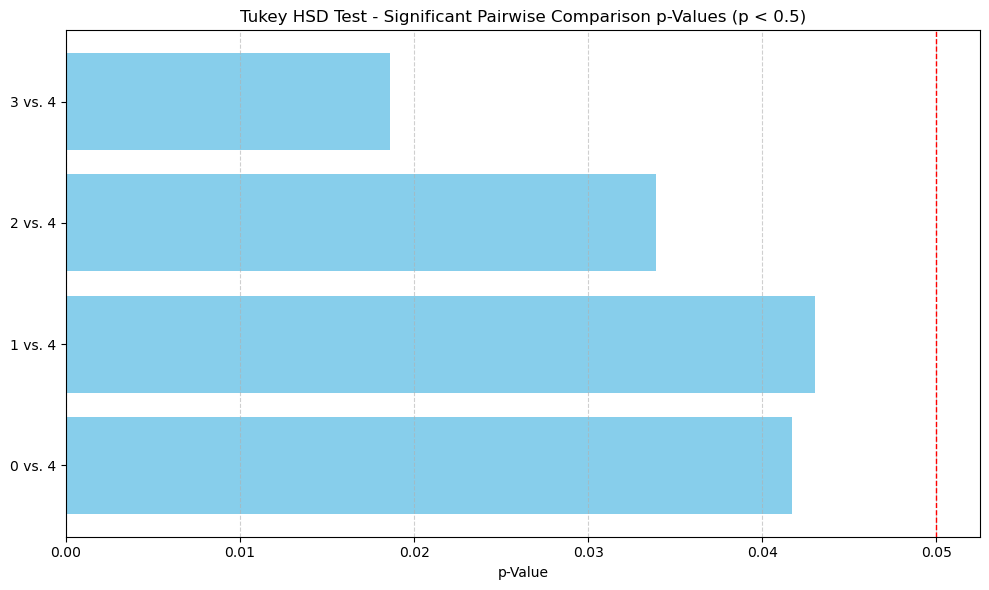%0A)

In \[122\]:

    from sklearn.feature_selection import f_classif
    from sklearn.feature_selection import SelectKBest

    f_p_values_anova= f_classif(x_train,y_train)
    f_p_values_anova

Out\[122\]:

    (array([ 0.04228859,  0.83700502,  2.92730877,  0.02270969,  2.49408415,
             2.16639554,  0.20293099,  0.68991884,  6.65190358,  2.37313714,
             2.85882811,  0.6609536 ,  1.58155934,  2.37386466,  3.2498648 ,
             0.0184199 ,  5.72604072, 16.06027909,  1.50125808,  2.56220374,
             1.91966491]),
     array([8.37104539e-01, 3.60433331e-01, 8.73436797e-02, 8.80239071e-01,
            1.14530910e-01, 1.41311282e-01, 6.52444436e-01, 4.06352528e-01,
            1.00198202e-02, 1.23694938e-01, 9.11260057e-02, 4.16380184e-01,
            2.08773971e-01, 1.23637440e-01, 7.16730493e-02, 8.92064808e-01,
            1.68637761e-02, 6.50275555e-05, 2.20711507e-01, 1.09701676e-01,
            1.66143768e-01]))

In \[123\]:

    # higher the values, more important the features is

    anova_values= pd.Series(f_p_values_anova[0])
    anova_values.index=x_train.columns
    anova_values.sort_values(ascending=False,inplace=True)
    anova_values.plot.bar()

Out\[123\]:

    <AxesSubplot:>

![](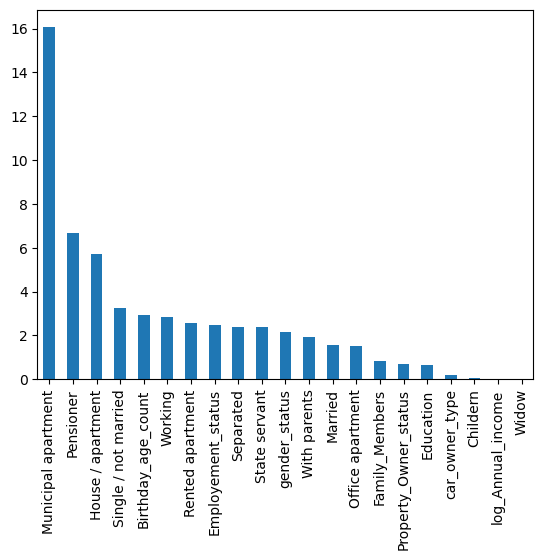%0A)

In \[124\]:

    # taking p_values of input to target variables
    # Lesser the p_value higher the importance
    # feature importance = p<0.5
    import pandas as pd
    p_values= pd.Series(f_p_values_anova[1])
    p_values.index=x_train.columns
    p_values.sort_values(ascending=True,inplace=True)

    ## bar plot
    ax = p_values.plot(kind='bar', figsize=(10, 6))

    # Set the y-axis limits
    ax.set_ylim(0, 0.5)

    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('P-value')
    plt.title('P-values for Features')

    # Show the plot
    p_values.plot.bar()

Out\[124\]:

    <AxesSubplot:title={'center':'P-values for Features'}, xlabel='Feature', ylabel='P-value'>

![](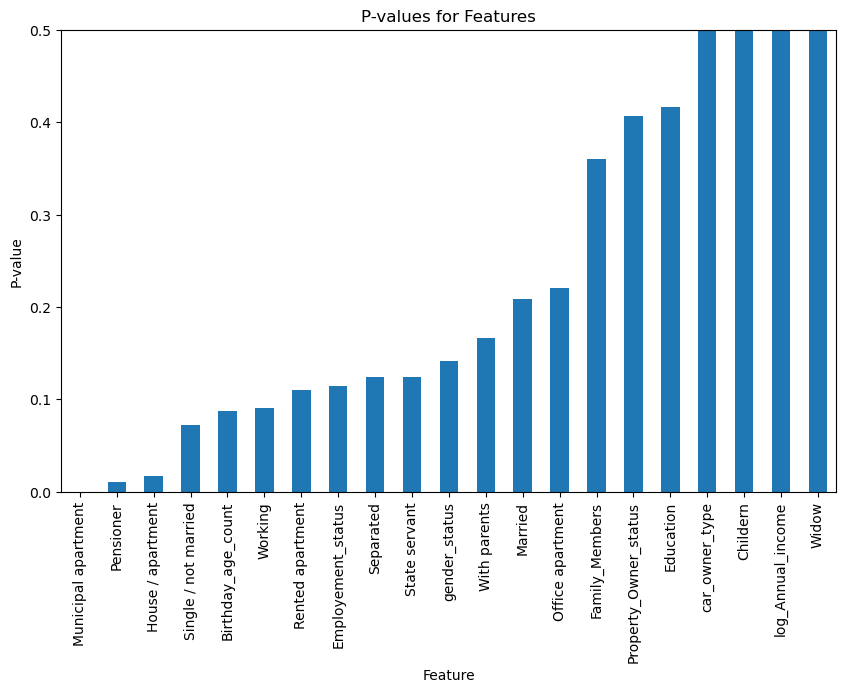%0A)

In \[125\]:

    p_values

Out\[125\]:

    Municipal apartment      0.000065
    Pensioner                0.010020
    House / apartment        0.016864
    Single / not married     0.071673
    Birthday_age_count       0.087344
    Working                  0.091126
    Rented apartment         0.109702
    Employement_status       0.114531
    Separated                0.123637
    State servant            0.123695
    gender_status            0.141311
    With parents             0.166144
    Married                  0.208774
    Office apartment         0.220712
    Family_Members           0.360433
    Property_Owner_status    0.406353
    Education                0.416380
    car_owner_type           0.652444
    Childern                 0.837105
    log_Annual_income        0.880239
    Widow                    0.892065
    dtype: float64

In \[126\]:

    # count on feature

    selected_features = p_values[p_values < 0.5]
    selected_features.count()
       

Out\[126\]:

    17

In \[127\]:

    # display selected feature names
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    anova_features= SelectKBest(f_classif,k=17)
    anova_features.fit(x_train,y_train)

Out\[127\]:

    SelectKBest(k=17)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SelectKBest

    SelectKBest(k=17)

In \[128\]:

    # columns_anova= 
    x_train.columns[anova_features.get_support()]

Out\[128\]:

    Index(['Family_Members', 'Birthday_age_count', 'Employement_status',
           'gender_status', 'Property_Owner_status', 'Pensioner', 'State servant',
           'Working', 'Education', 'Married', 'Separated', 'Single / not married',
           'House / apartment', 'Municipal apartment', 'Office apartment',
           'Rented apartment', 'With parents'],
          dtype='object')

In \[129\]:

    columns_anova = x_train.columns[anova_features.get_support()]

In \[130\]:

    x_anova_train = anova_features.transform(x_train)
    x_anova_test = anova_features.transform(x_test)

    x_anova_train = pd.DataFrame(x_train, columns=columns_anova)
    x_anova_test = pd.DataFrame(x_test, columns=columns_anova)

In \[131\]:

    x_anova_train.shape

Out\[131\]:

    (1237, 17)

In \[132\]:

    x_anova_test.shape

Out\[132\]:

    (310, 17)

#### Checking the Accuracy after Anova Test (Moment of Truth)<a href="#Checking-the-Accuracy-after-Anova-Test-(Moment-of-Truth)"
class="anchor-link">¶</a>

In \[133\]:

    # Initialize and train logistic regression model
    lr = LogisticRegression(penalty='l1', dual=False, C=2.0, random_state=42, solver= 'liblinear', max_iter=100)

    lr.fit(x_anova_train, y_train)

    # cross validation

    mean_accuracy= np.mean(cross_val_score(lr,x_anova_train, y_train,cv=4,scoring='accuracy'))
    print(f'cross_val_accuracy is : {mean_accuracy}')

    cross_val_accuracy is : 0.8860136757490343

In \[ \]:

     

### Accuracy on Train data is 88.6%<a href="#Accuracy-on-Train-data-is--88.6%25" class="anchor-link">¶</a>

-   features extracted from anova test.
-   count of feature is 17

In \[134\]:

    # P values of features
    p_values.sort_values(ascending=True,inplace=True)
    p_values

Out\[134\]:

    Municipal apartment      0.000065
    Pensioner                0.010020
    House / apartment        0.016864
    Single / not married     0.071673
    Birthday_age_count       0.087344
    Working                  0.091126
    Rented apartment         0.109702
    Employement_status       0.114531
    Separated                0.123637
    State servant            0.123695
    gender_status            0.141311
    With parents             0.166144
    Married                  0.208774
    Office apartment         0.220712
    Family_Members           0.360433
    Property_Owner_status    0.406353
    Education                0.416380
    car_owner_type           0.652444
    Childern                 0.837105
    log_Annual_income        0.880239
    Widow                    0.892065
    dtype: float64

### Hypothesis testing<a href="#Hypothesis-testing" class="anchor-link">¶</a>

#### Age:<a href="#Age:" class="anchor-link">¶</a>

Null Hypothesis (Ho)-\> Age of client having no significance on
approval.

#### Annual_income:<a href="#Annual_income:" class="anchor-link">¶</a>

Null Hypothesis (Ho)-\> No direct relation in Annual_income and
approval.

Assumption from anova test : \# Null hypothesis is fail on Age
hypothesis, means Age feature having significance on approval. \#
p_value = 0.087, As p_value\<0.5 null hypothesis is failAssumption from
anova test : \# Null hypothesis is right on "Annual_income" hypothesis,
means "Annual_income" feature having no significance on approval. \#
p_value = 0.88, As p_value\>0.5 then null hypothesis is correct.

### CHi-Squre Test<a href="#CHi-Squre-Test" class="anchor-link">¶</a>

#### Chi-Squre Test applicable on catagorical features so, storing those featue into another variable<a
href="#Chi-Squre-Test-applicable-on-catagorical-features-so,-storing-those-featue-into-another-variable"
class="anchor-link">¶</a>

In \[135\]:

    dataset_copy.head(1)

Out\[135\]:

|     | GENDER | Car_Owner | Property_Owner | Childern | Type_Income | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type |
|-----|--------|-----------|----------------|----------|-------------|------------------|----------------|-------------------|----------------|-------|--------------------|-------------------|--------------------|---------------|----------------|
| 0   | M      | Y         | Y              | 0        | Pensioner   | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 12.100712         | 0                  | 1             | 1              |

##Tests whether two categorical variables are related or independent.
#Assumptions - independent observation, size in each box of contingency
table \> 25 \# Example of the Chi-Squared Test

In \[136\]:

    x_chisq_cols= dataset.drop(columns=['log_Annual_income','Birthday_age_count','label'])
    y_chisq_cols= dataset['label']

In \[137\]:

    x_chisq_cols.shape

Out\[137\]:

    (1547, 19)

In \[138\]:

    X_chisq_train,X_chisq_test, Y_chisq_train,Y_chisq_test= train_test_split(x_chisq_cols,y_chisq_cols,test_size=0.2,train_size=0.80,random_state=100,shuffle=True, stratify=y)

In \[139\]:

    import pandas as pd
    from scipy.stats import chi2_contingency

    # Define the list of categorical column names
    categorical_columns = [
        'Childern', 'Family_Members', 'Employement_status', 'gender_status',
        'car_owner_type', 'Property_Owner_status', 'Pensioner', 'State servant',
        'Working', 'Education', 'Married', 'Separated', 'Single / not married',
        'Widow', 'House / apartment', 'Municipal apartment', 'Office apartment',
        'Rented apartment', 'With parents'
    ]

    #  empty list to store the results for dependent pairs
    dependent_results = []

    # Loop through all pairs of categorical columns
    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            var1 = categorical_columns[i]
            var2 = categorical_columns[j]
            
            # contingency table for the pair of variables
            contingency_data = pd.crosstab(dataset[var1], dataset[var2], margins=False)
            
            # Perform the chi-squared test
            stat, p, dof, expected = chi2_contingency(contingency_data)
            
            # Determine whether the categories are independent or dependent
            if p <= 0.05:  # Check if p-value is less than or equal to the significance level
                result = 'dependent categories'
                dependent_results.append((var1, var2, stat, p))
            
    #  results for dependent variable pairs
    print("Dependent Results:")
    for var1, var2, stat, p in dependent_results:
        print(f'{var1} and {var2} are {result} (Chi-squared statistic: {stat:.2f}, p-value: {p:.4f})')

    Dependent Results:
    Childern and Family_Members are dependent categories (Chi-squared statistic: 5674.64, p-value: 0.0000)
    Childern and Employement_status are dependent categories (Chi-squared statistic: 108.96, p-value: 0.0000)
    Childern and car_owner_type are dependent categories (Chi-squared statistic: 9.85, p-value: 0.0430)
    Childern and Pensioner are dependent categories (Chi-squared statistic: 104.69, p-value: 0.0000)
    Childern and Working are dependent categories (Chi-squared statistic: 17.47, p-value: 0.0016)
    Childern and Education are dependent categories (Chi-squared statistic: 33.01, p-value: 0.0074)
    Childern and Married are dependent categories (Chi-squared statistic: 52.16, p-value: 0.0000)
    Childern and Single / not married are dependent categories (Chi-squared statistic: 32.46, p-value: 0.0000)
    Childern and Widow are dependent categories (Chi-squared statistic: 23.34, p-value: 0.0001)
    Family_Members and Employement_status are dependent categories (Chi-squared statistic: 108.84, p-value: 0.0000)
    Family_Members and gender_status are dependent categories (Chi-squared statistic: 18.75, p-value: 0.0021)
    Family_Members and car_owner_type are dependent categories (Chi-squared statistic: 35.76, p-value: 0.0000)
    Family_Members and Pensioner are dependent categories (Chi-squared statistic: 102.12, p-value: 0.0000)
    Family_Members and Working are dependent categories (Chi-squared statistic: 19.24, p-value: 0.0017)
    Family_Members and Married are dependent categories (Chi-squared statistic: 896.69, p-value: 0.0000)
    Family_Members and Separated are dependent categories (Chi-squared statistic: 190.39, p-value: 0.0000)
    Family_Members and Single / not married are dependent categories (Chi-squared statistic: 590.24, p-value: 0.0000)
    Family_Members and Widow are dependent categories (Chi-squared statistic: 248.77, p-value: 0.0000)
    Family_Members and Municipal apartment are dependent categories (Chi-squared statistic: 16.45, p-value: 0.0057)
    Employement_status and gender_status are dependent categories (Chi-squared statistic: 47.98, p-value: 0.0000)
    Employement_status and car_owner_type are dependent categories (Chi-squared statistic: 34.79, p-value: 0.0000)
    Employement_status and Property_Owner_status are dependent categories (Chi-squared statistic: 15.11, p-value: 0.0001)
    Employement_status and Pensioner are dependent categories (Chi-squared statistic: 1484.75, p-value: 0.0000)
    Employement_status and State servant are dependent categories (Chi-squared statistic: 24.17, p-value: 0.0000)
    Employement_status and Working are dependent categories (Chi-squared statistic: 331.17, p-value: 0.0000)
    Employement_status and Education are dependent categories (Chi-squared statistic: 34.05, p-value: 0.0000)
    Employement_status and Married are dependent categories (Chi-squared statistic: 11.64, p-value: 0.0006)
    Employement_status and Widow are dependent categories (Chi-squared statistic: 107.79, p-value: 0.0000)
    Employement_status and House / apartment are dependent categories (Chi-squared statistic: 5.60, p-value: 0.0180)
    Employement_status and Municipal apartment are dependent categories (Chi-squared statistic: 5.99, p-value: 0.0144)
    Employement_status and With parents are dependent categories (Chi-squared statistic: 15.88, p-value: 0.0001)
    gender_status and car_owner_type are dependent categories (Chi-squared statistic: 205.24, p-value: 0.0000)
    gender_status and Pensioner are dependent categories (Chi-squared statistic: 44.83, p-value: 0.0000)
    gender_status and Working are dependent categories (Chi-squared statistic: 15.58, p-value: 0.0001)
    gender_status and Married are dependent categories (Chi-squared statistic: 14.77, p-value: 0.0001)
    gender_status and Separated are dependent categories (Chi-squared statistic: 6.19, p-value: 0.0129)
    gender_status and Widow are dependent categories (Chi-squared statistic: 37.69, p-value: 0.0000)
    gender_status and House / apartment are dependent categories (Chi-squared statistic: 9.24, p-value: 0.0024)
    gender_status and Rented apartment are dependent categories (Chi-squared statistic: 9.62, p-value: 0.0019)
    car_owner_type and Pensioner are dependent categories (Chi-squared statistic: 32.73, p-value: 0.0000)
    car_owner_type and Working are dependent categories (Chi-squared statistic: 5.46, p-value: 0.0194)
    car_owner_type and Education are dependent categories (Chi-squared statistic: 32.73, p-value: 0.0000)
    car_owner_type and Married are dependent categories (Chi-squared statistic: 37.31, p-value: 0.0000)
    car_owner_type and Separated are dependent categories (Chi-squared statistic: 5.40, p-value: 0.0202)
    car_owner_type and Single / not married are dependent categories (Chi-squared statistic: 12.28, p-value: 0.0005)
    car_owner_type and Widow are dependent categories (Chi-squared statistic: 12.59, p-value: 0.0004)
    car_owner_type and Municipal apartment are dependent categories (Chi-squared statistic: 6.35, p-value: 0.0117)
    car_owner_type and Office apartment are dependent categories (Chi-squared statistic: 3.84, p-value: 0.0500)
    Property_Owner_status and Pensioner are dependent categories (Chi-squared statistic: 14.52, p-value: 0.0001)
    Property_Owner_status and Working are dependent categories (Chi-squared statistic: 5.69, p-value: 0.0171)
    Property_Owner_status and Education are dependent categories (Chi-squared statistic: 11.36, p-value: 0.0228)
    Property_Owner_status and House / apartment are dependent categories (Chi-squared statistic: 68.04, p-value: 0.0000)
    Property_Owner_status and Municipal apartment are dependent categories (Chi-squared statistic: 31.32, p-value: 0.0000)
    Property_Owner_status and With parents are dependent categories (Chi-squared statistic: 32.58, p-value: 0.0000)
    Pensioner and State servant are dependent categories (Chi-squared statistic: 25.10, p-value: 0.0000)
    Pensioner and Working are dependent categories (Chi-squared statistic: 343.53, p-value: 0.0000)
    Pensioner and Education are dependent categories (Chi-squared statistic: 31.40, p-value: 0.0000)
    Pensioner and Married are dependent categories (Chi-squared statistic: 9.89, p-value: 0.0017)
    Pensioner and Widow are dependent categories (Chi-squared statistic: 102.77, p-value: 0.0000)
    Pensioner and House / apartment are dependent categories (Chi-squared statistic: 5.33, p-value: 0.0209)
    Pensioner and Municipal apartment are dependent categories (Chi-squared statistic: 5.37, p-value: 0.0205)
    Pensioner and With parents are dependent categories (Chi-squared statistic: 14.13, p-value: 0.0002)
    State servant and Working are dependent categories (Chi-squared statistic: 131.04, p-value: 0.0000)
    Working and Education are dependent categories (Chi-squared statistic: 12.00, p-value: 0.0173)
    Working and Married are dependent categories (Chi-squared statistic: 5.26, p-value: 0.0218)
    Working and Widow are dependent categories (Chi-squared statistic: 14.61, p-value: 0.0001)
    Education and Married are dependent categories (Chi-squared statistic: 12.57, p-value: 0.0136)
    Education and Widow are dependent categories (Chi-squared statistic: 16.21, p-value: 0.0027)
    Education and Rented apartment are dependent categories (Chi-squared statistic: 12.15, p-value: 0.0163)
    Education and With parents are dependent categories (Chi-squared statistic: 10.35, p-value: 0.0349)
    Married and Separated are dependent categories (Chi-squared statistic: 209.91, p-value: 0.0000)
    Married and Single / not married are dependent categories (Chi-squared statistic: 556.75, p-value: 0.0000)
    Married and Widow are dependent categories (Chi-squared statistic: 162.78, p-value: 0.0000)
    Married and House / apartment are dependent categories (Chi-squared statistic: 5.51, p-value: 0.0189)
    Married and Municipal apartment are dependent categories (Chi-squared statistic: 6.37, p-value: 0.0116)
    Separated and Single / not married are dependent categories (Chi-squared statistic: 16.18, p-value: 0.0001)
    Separated and Widow are dependent categories (Chi-squared statistic: 4.10, p-value: 0.0429)
    Single / not married and Widow are dependent categories (Chi-squared statistic: 12.35, p-value: 0.0004)
    Single / not married and House / apartment are dependent categories (Chi-squared statistic: 11.76, p-value: 0.0006)
    Single / not married and Municipal apartment are dependent categories (Chi-squared statistic: 17.94, p-value: 0.0000)
    House / apartment and Municipal apartment are dependent categories (Chi-squared statistic: 440.99, p-value: 0.0000)
    House / apartment and Office apartment are dependent categories (Chi-squared statistic: 65.33, p-value: 0.0000)
    House / apartment and Rented apartment are dependent categories (Chi-squared statistic: 165.54, p-value: 0.0000)
    House / apartment and With parents are dependent categories (Chi-squared statistic: 682.80, p-value: 0.0000)

In \[140\]:

    from sklearn.feature_selection import chi2
    import scipy.stats as stats

In \[141\]:

    f_p_values= chi2(X_chisq_train,Y_chisq_train)
    f_p_values

Out\[141\]:

    (array([5.46357578e-01, 3.07285400e-01, 4.40125306e-02, 1.77850876e+00,
            1.40984318e-03, 1.86605270e-01, 2.57252798e+00, 3.57000593e+00,
            5.60320968e-01, 3.67170619e-02, 2.13055911e-03, 1.28537169e+00,
            3.71821822e-01, 5.26659630e-02, 7.58139045e-01, 1.11596941e+01,
            2.07619668e+00, 2.52584359e+00, 1.12954542e+00]),
     array([4.59809817e-01, 5.79350769e-01, 8.33830301e-01, 1.82332549e-01,
            9.70048166e-01, 6.65757169e-01, 1.08733845e-01, 5.88321012e-02,
            4.54130948e-01, 8.48042251e-01, 9.63184334e-01, 2.56902644e-01,
            5.42012890e-01, 8.18487579e-01, 3.83911532e-01, 8.35937061e-04,
            1.49612557e-01, 1.11994872e-01, 2.87872322e-01]))

In \[142\]:

    # taking chi_values of input to target variables
    # Higher the Chi_value higher the importance
    import pandas as pd
    chi_values= pd.Series(f_p_values[0])
    chi_values.index=X_chisq_train.columns
    chi_values.sort_values(ascending=False,inplace=True)

    ## bar plot
    chi_values.plot.bar()

Out\[142\]:

    <AxesSubplot:>

![](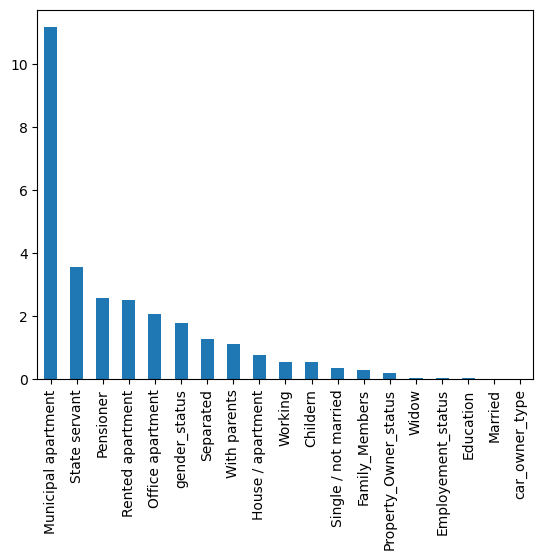%0A)

In \[143\]:

    # taking p_values of input to target variables
    # Lesser the p_value higher the importance
    # feature importance = p<0.5
    import pandas as pd
    p_values_chi= pd.Series(f_p_values[1])
    p_values_chi.index=X_chisq_train.columns
    p_values_chi.sort_values(ascending=True,inplace=True)

    ## bar plot
    ax = p_values_chi.plot(kind='bar', figsize=(10, 6))

    # Set the y-axis limits
    ax.set_ylim(0, 0.5)

    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('P-value')
    plt.title('P-values for Features')

    # Show the plot
    plt.show()

![](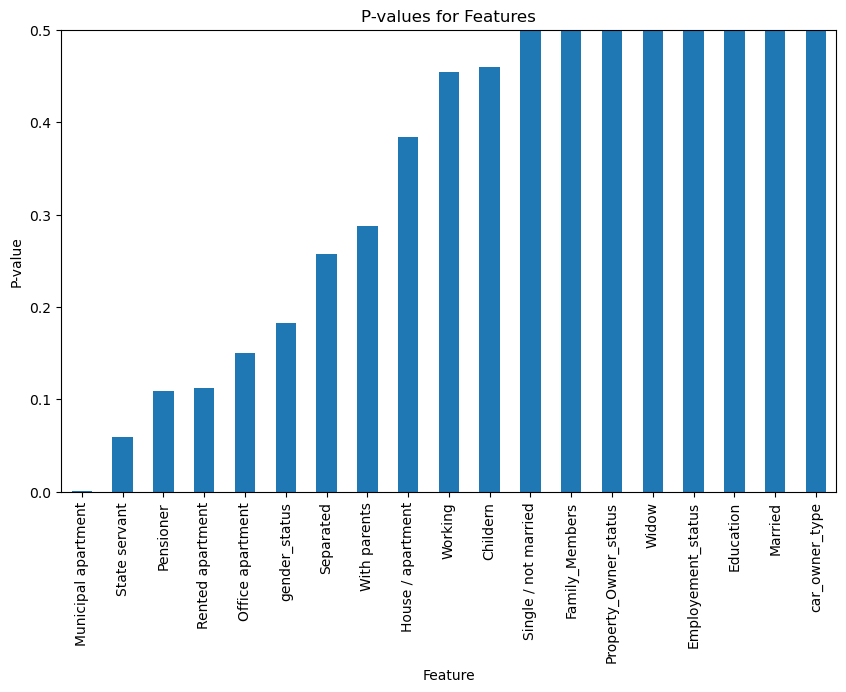%0A)

In \[144\]:

    # count of features having pvalue<0.5
    p_values_chi.count()

Out\[144\]:

    19

In \[145\]:

    chi_features=SelectKBest(chi2, k=9)
    chi_features.fit(X_chisq_train,Y_chisq_train)

Out\[145\]:

    SelectKBest(k=9, score_func=<function chi2 at 0x000002076E3E70D0>)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SelectKBest

    SelectKBest(k=9, score_func=<function chi2 at 0x000002076E3E70D0>)

In \[146\]:

    chi_features

Out\[146\]:

    SelectKBest(k=9, score_func=<function chi2 at 0x000002076E3E70D0>)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SelectKBest

    SelectKBest(k=9, score_func=<function chi2 at 0x000002076E3E70D0>)

In \[147\]:

    columns_chisq= X_chisq_train.columns[chi_features.get_support()]
    columns_chisq

Out\[147\]:

    Index(['gender_status', 'Pensioner', 'State servant', 'Separated',
           'House / apartment', 'Municipal apartment', 'Office apartment',
           'Rented apartment', 'With parents'],
          dtype='object')

In \[148\]:

    X_chisq_train.shape

Out\[148\]:

    (1237, 19)

In \[149\]:

    X_chisq_train = chi_features.transform(X_chisq_train)
    X_chisq_test = chi_features.transform(X_chisq_test)

    X_chisq_train = pd.DataFrame(X_chisq_train, columns=columns_chisq)
    X_chisq_test = pd.DataFrame(X_chisq_test, columns=columns_chisq)

In \[150\]:

    X_chisq_train.shape

Out\[150\]:

    (1237, 9)

In \[151\]:

    # count of features having pvalue<0.5
    p_values_chi

Out\[151\]:

    Municipal apartment      0.000836
    State servant            0.058832
    Pensioner                0.108734
    Rented apartment         0.111995
    Office apartment         0.149613
    gender_status            0.182333
    Separated                0.256903
    With parents             0.287872
    House / apartment        0.383912
    Working                  0.454131
    Childern                 0.459810
    Single / not married     0.542013
    Family_Members           0.579351
    Property_Owner_status    0.665757
    Widow                    0.818488
    Employement_status       0.833830
    Education                0.848042
    Married                  0.963184
    car_owner_type           0.970048
    dtype: float64

### Marital status Hypothesis :<a href="#Marital-status-Hypothesis-:" class="anchor-link">¶</a>

both catagories "Separated", "With parents" having p_value \<0.5 so null
hypothesis is correct

#### Above are the features which having P_value\<0.5 so this features are more important.<a
href="#Above-are-the-features-which-having-P_value%3C0.5-so-this-features-are-more-important."
class="anchor-link">¶</a>

### Appling Correlation Test on 2 Continous Data<a href="#Appling-Correlation-Test-on-2-Continous-Data"
class="anchor-link">¶</a>

#### Pearson Corr for linear Data<a href="#Pearson-Corr-for-linear-Data" class="anchor-link">¶</a>

\## Assumption is both feature is releted to each other

In \[152\]:

    x_train.head(1)

Out\[152\]:

|      | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|------|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 1138 | 0        | 1              | 0.872393           | 0.588301          | 1                  | 0             | 0              | 1                     | 0         | 0             | ... | 5         | 0       | 0         | 0                    | 1     | 1                 | 0                   | 0                | 0                | 0            |

1 rows × 21 columns

In \[153\]:

    sample_df=x_train.loc[:,['Birthday_age_count','log_Annual_income']]
    sample_df.shape

Out\[153\]:

    (1237, 2)

#### Extracting sample of 120 rows<a href="#Extracting-sample-of-120-rows" class="anchor-link">¶</a>

### To Purform Sampling:<a href="#To-Purform-Sampling:" class="anchor-link">¶</a>

-   when datapoints is huge, then purforming test on Random sample data
    takes less time, and result will be near similar.
-   And randomness in data is more important to minimize the biasness

In \[154\]:

    sample_df_corr = sample_df.sample(n=120, random_state=100)
    sample_df_corr.shape

Out\[154\]:

    (120, 2)

In \[155\]:

    sns.scatterplot(sample_df_corr['Birthday_age_count'],sample_df_corr['log_Annual_income'])

    C:\Users\rjris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

    Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

Out\[155\]:

    <AxesSubplot:xlabel='Birthday_age_count', ylabel='log_Annual_income'>

![](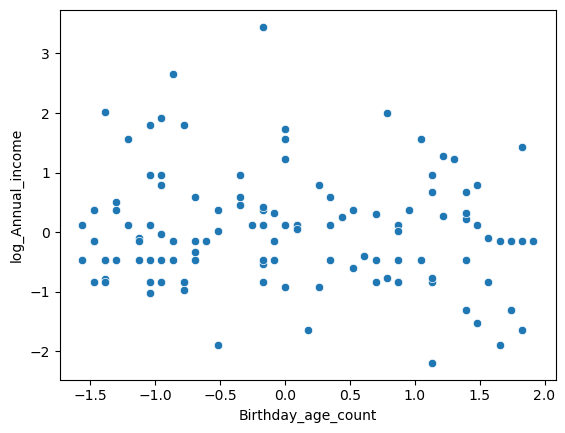%0A)

In \[156\]:

    from scipy import stats
    from scipy.stats import pearsonr
    stat,p= pearsonr(sample_df_corr['Birthday_age_count'],sample_df_corr['log_Annual_income'])
    print('stat=%.3f, p=%.5f' % (stat, p))

    if p > 0.05:
        print('independent samples (fail to reject the null hypothesis)')
    else:
        print('dependent samples (reject the null hypothesis)')

    stat=-0.115, p=0.21253
    independent samples (fail to reject the null hypothesis)

\## Accept the Null hypothesis , there is no relation between \[annual
income & age\] as per pearson corr## code , when more feature's is there
to check

In \[157\]:

    # corr_matrics= xcorr_train.corr()
    # columns=corr_matrics.columns
    # columns_to_drop=[]
    # for i in range(len(columns)):
    #     for j in range(i+1,len(columns)):
    #         if corr_matrics.loc[columns[i],columns[j]]>0.1:
    #           columns_to_drop.append(columns[j])
    # print(columns_to_drop)

#### Spearman Rank Corr (Non-linear)<a href="#Spearman-Rank-Corr-(Non-linear)" class="anchor-link">¶</a>

In \[158\]:

    from scipy import stats
    from scipy.stats import spearmanr

    stat,p= spearmanr(sample_df_corr['Birthday_age_count'],sample_df_corr['log_Annual_income'])
    print('stat=%.3f, p=%.5f' % (stat, p))

    if p > 0.05:
        print('independent samples (fail to reject the null hypothesis)')
    else:
        print('dependent samples (reject the null hypothesis)')

    stat=-0.061, p=0.50949
    independent samples (fail to reject the null hypothesis)

\# There are strong evidence of No relation between age and
log_annual_income feature because pvalue \> 0.05## Null hypothesis is
correct

### Mutual Info Classifier (Information Gain classification)<a href="#Mutual-Info-Classifier-(Information-Gain-classification)"
class="anchor-link">¶</a>

In \[159\]:

    x_train.head(1)

Out\[159\]:

|      | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|------|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 1138 | 0        | 1              | 0.872393           | 0.588301          | 1                  | 0             | 0              | 1                     | 0         | 0             | ... | 5         | 0       | 0         | 0                    | 1     | 1                 | 0                   | 0                | 0                | 0            |

1 rows × 21 columns

In \[160\]:

    y_train.head(1)

Out\[160\]:

    1138    0
    Name: label, dtype: int64

In \[161\]:

    from sklearn.feature_selection import mutual_info_classif

    mi_scores = mutual_info_classif(x_train, y_train, random_state=42)

In \[162\]:

    mi_scores

Out\[162\]:

    array([0.        , 0.        , 0.00270944, 0.        , 0.        ,
           0.        , 0.00618783, 0.        , 0.00671669, 0.        ,
           0.03271019, 0.01463135, 0.01383813, 0.00865977, 0.        ,
           0.        , 0.        , 0.01045319, 0.        , 0.00844737,
           0.        ])

In \[163\]:

    x_train.shape

Out\[163\]:

    (1237, 21)

In \[164\]:

    mic= pd.Series(mi_scores,index=x_train.columns)
    mic.sort_values(ascending=False,inplace=True)
    mic.plot.bar()

Out\[164\]:

    <AxesSubplot:>

![](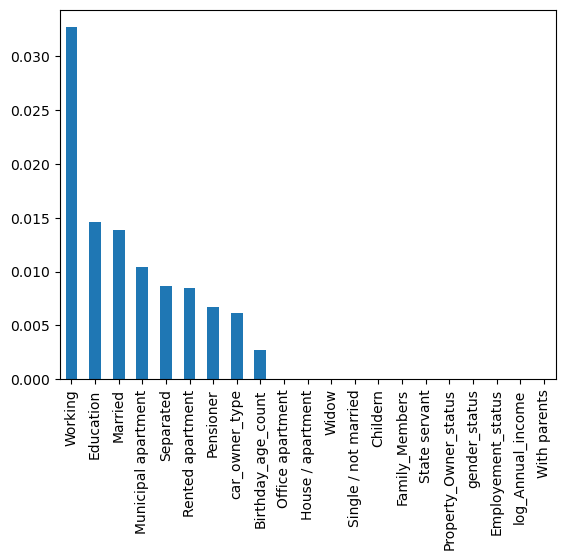%0A)

In \[165\]:

    mic

Out\[165\]:

    Working                  0.032710
    Education                0.014631
    Married                  0.013838
    Municipal apartment      0.010453
    Separated                0.008660
    Rented apartment         0.008447
    Pensioner                0.006717
    car_owner_type           0.006188
    Birthday_age_count       0.002709
    Office apartment         0.000000
    House / apartment        0.000000
    Widow                    0.000000
    Single / not married     0.000000
    Childern                 0.000000
    Family_Members           0.000000
    State servant            0.000000
    Property_Owner_status    0.000000
    gender_status            0.000000
    Employement_status       0.000000
    log_Annual_income        0.000000
    With parents             0.000000
    dtype: float64

In \[166\]:

    from sklearn.feature_selection import SelectPercentile

In \[167\]:

    mic_features= SelectPercentile(mutual_info_classif,percentile=40)
    mic_features.fit(x_train,y_train)
    mic_columns= x_train.columns[mic_features.get_support()]
    mic_columns

Out\[167\]:

    Index(['log_Annual_income', 'Employement_status', 'Property_Owner_status',
           'State servant', 'Working', 'Education', 'Separated',
           'House / apartment'],
          dtype='object')

In \[168\]:

    mic_features

Out\[168\]:

    SelectPercentile(percentile=40,
                     score_func=<function mutual_info_classif at 0x000002076E3D95E0>)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SelectPercentile

    SelectPercentile(percentile=40,
                     score_func=<function mutual_info_classif at 0x000002076E3D95E0>)

In \[169\]:

    x_train_mic_percentile= mic_features.transform(x_train)
    x_test_mic_percentile= mic_features.transform(x_test)

In \[170\]:

    x_train_mic_percentile= pd.DataFrame(x_train_mic_percentile,columns=mic_columns)
    x_test_mic_percentile= pd.DataFrame(x_test_mic_percentile,columns=mic_columns)

In \[171\]:

    x_train_mic_percentile.shape

Out\[171\]:

    (1237, 8)

#### Appling Logistic regression to check accuracy<a href="#Appling-Logistic-regression-to-check-accuracy"
class="anchor-link">¶</a>

In \[172\]:

    lr = LogisticRegression(penalty='l1', dual=False, C=2.0, random_state=42, solver= 'liblinear', max_iter=100)

    lr.fit(x_train_mic_percentile, y_train)

    # cross validation

    mean_accuracy= np.mean(cross_val_score(lr,x_train_mic_percentile, y_train,cv=4,scoring='accuracy'))
    print(f'cross_val_accuracy is : {mean_accuracy}')

    cross_val_accuracy is : 0.8868227372377074

In \[ \]:

     

## ML Models<a href="#ML-Models" class="anchor-link">¶</a>

In \[173\]:

    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.svm import SVR
    from sklearn.linear_model import SGDClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.feature_selection import RFECV
    from sklearn.feature_selection import mutual_info_regression
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.decomposition import PCA
    from sklearn.model_selection import cross_val_score

## Wrapper based Feature Selection<a href="#Wrapper-based-Feature-Selection" class="anchor-link">¶</a>

### Exhaustive Feature Selection<a href="#Exhaustive-Feature-Selection" class="anchor-link">¶</a>

Advantage: \## ExhaustiveFeatureSelector provide best results if feature
is upto 20, else overfitting and computing issues occurs \## formula =
2^n-1

In \[174\]:

    !pip install --upgrade scikit-learn mlxtend

    Requirement already satisfied: scikit-learn in c:\users\rjris\anaconda3\lib\site-packages (1.3.0)
    Collecting scikit-learn
      Downloading scikit_learn-1.3.1-cp39-cp39-win_amd64.whl (9.3 MB)
         ---------------------------------------- 9.3/9.3 MB 3.3 MB/s eta 0:00:00
    Requirement already satisfied: mlxtend in c:\users\rjris\anaconda3\lib\site-packages (0.22.0)
    Collecting mlxtend
      Downloading mlxtend-0.23.0-py3-none-any.whl (1.4 MB)
         ---------------------------------------- 1.4/1.4 MB 3.3 MB/s eta 0:00:00
    Requirement already satisfied: numpy<2.0,>=1.17.3 in c:\users\rjris\anaconda3\lib\site-packages (from scikit-learn) (1.25.1)
    Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\rjris\anaconda3\lib\site-packages (from scikit-learn) (3.2.0)
    Requirement already satisfied: joblib>=1.1.1 in c:\users\rjris\anaconda3\lib\site-packages (from scikit-learn) (1.3.2)
    Requirement already satisfied: scipy>=1.5.0 in c:\users\rjris\anaconda3\lib\site-packages (from scikit-learn) (1.11.1)
    Requirement already satisfied: pandas>=0.24.2 in c:\users\rjris\anaconda3\lib\site-packages (from mlxtend) (1.4.4)
    Requirement already satisfied: matplotlib>=3.0.0 in c:\users\rjris\anaconda3\lib\site-packages (from mlxtend) (3.5.2)
    Requirement already satisfied: cycler>=0.10 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (0.11.0)
    Requirement already satisfied: fonttools>=4.22.0 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (4.25.0)
    Requirement already satisfied: python-dateutil>=2.7 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (2.8.2)
    Requirement already satisfied: packaging>=20.0 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (21.3)
    Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (1.4.2)
    Requirement already satisfied: pyparsing>=2.2.1 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (3.0.9)
    Requirement already satisfied: pillow>=6.2.0 in c:\users\rjris\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (9.2.0)
    Requirement already satisfied: pytz>=2020.1 in c:\users\rjris\anaconda3\lib\site-packages (from pandas>=0.24.2->mlxtend) (2022.1)
    Requirement already satisfied: six>=1.5 in c:\users\rjris\anaconda3\lib\site-packages (from python-dateutil>=2.7->matplotlib>=3.0.0->mlxtend) (1.16.0)
    Installing collected packages: scikit-learn, mlxtend
      Attempting uninstall: scikit-learn
        Found existing installation: scikit-learn 1.3.0
        Uninstalling scikit-learn-1.3.0:
          Successfully uninstalled scikit-learn-1.3.0

    ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rjris\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
    Consider using the `--user` option or check the permissions.

In \[175\]:

    # from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

    # lr = LogisticRegression(penalty='l1', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)

    # sel = EFS(lr, max_features=17, scoring='accuracy', cv=5)

In \[176\]:

    # model.best_feature_names_

In \[177\]:

    # detailed output
    # model.subsets_

In \[178\]:

    # code for making above details to dictionary

    # metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
    # metric_df

### Backward Feature Elimination / Sequential Backward Elimination<a
href="#Backward-Feature-Elimination-/-Sequential-Backward-Elimination"
class="anchor-link">¶</a>

Advantages: \## Its gives more accuracy if having more feature \## its
makes less subsets so uses less computational power Disadvantages: \##
its eleminate the 1 feature,and it never use that feature again. \##
Might be that feature is important for prediction.

In \[179\]:

    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score,f1_score
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In \[180\]:

    x_train.shape

Out\[180\]:

    (1237, 21)

In \[181\]:

    y_train.shape

Out\[181\]:

    (1237,)

In \[182\]:

    x_train.head(1)

Out\[182\]:

|      | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|------|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 1138 | 0        | 1              | 0.872393           | 0.588301          | 1                  | 0             | 0              | 1                     | 0         | 0             | ... | 5         | 0       | 0         | 0                    | 1     | 1                 | 0                   | 0                | 0                | 0            |

1 rows × 21 columns

In \[183\]:

    from sklearn.feature_selection import SequentialFeatureSelector as SFS
    lr = LogisticRegression(penalty='l2', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)
    # n_features_to_select=5,
    sfs1 = SFS(lr,
               direction='backward',
               scoring='f1',
               n_jobs=-1,
               cv=10)

    # sfs1 = sfs1.fit(x_train, y_train)
    sfs1 = sfs1.fit(x_train,y_train)
    sfs1

Out\[183\]:

    SequentialFeatureSelector(cv=10, direction='backward',
                              estimator=LogisticRegression(C=3.0, random_state=42,
                                                           solver='liblinear'),
                              n_jobs=-1, scoring='f1')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SequentialFeatureSelector

    SequentialFeatureSelector(cv=10, direction='backward',
                              estimator=LogisticRegression(C=3.0, random_state=42,
                                                           solver='liblinear'),
                              n_jobs=-1, scoring='f1')

estimator: LogisticRegression

    LogisticRegression(C=3.0, random_state=42, solver='liblinear')

LogisticRegression

    LogisticRegression(C=3.0, random_state=42, solver='liblinear')

In \[184\]:

    np.arange(x_train.shape[1])[sfs1.support_]

Out\[184\]:

    array([ 1,  9, 10, 11, 13, 14, 15, 16, 18, 19, 20])

In \[185\]:

    selected_feature_indices = np.arange(x_train.shape[1])[sfs1.support_]
    selected_features = x_train.columns[selected_feature_indices]
    selected_features

Out\[185\]:

    Index(['Family_Members', 'State servant', 'Working', 'Education', 'Separated',
           'Single / not married', 'Widow', 'House / apartment',
           'Office apartment', 'Rented apartment', 'With parents'],
          dtype='object')

In \[186\]:

    print(len(sfs1.support_))

    21

In \[187\]:

    x_train.shape[1]

Out\[187\]:

    21

In \[188\]:

    from sklearn.model_selection import KFold, cross_val_score
    x_train_sel1 = sfs1.transform(x_train)
    x_test_sel1 = sfs1.transform(x_test)

    # KFold object with 'k' folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    model = LogisticRegression(penalty='l1', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)

    print("training",np.mean(cross_val_score(model, x_train_sel1, y_train,scoring='accuracy',cv=kf)))
    print("testing",np.mean(cross_val_score(model, x_test_sel1, y_test,scoring='accuracy')))

    training 0.8859997388010971
    testing 0.8870967741935484

In \[189\]:

    from sklearn.model_selection import KFold, cross_val_score



    # Define the number of folds (k)
    k = 5  # You can change this value to your desired number of folds

    # Create a KFold object with 'k' folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # You can adjust shuffle and random_state as needed

    # Use the KFold object in cross_val_score
    scores = cross_val_score(model, x_train_sel1, y_train, scoring='accuracy', cv=kf)

    # Calculate and print the mean accuracy score
    print("Mean training accuracy:", np.mean(scores))

    Mean training accuracy: 0.8859997388010971

### Forward Selection Wrapper Method for Feature Selection<a href="#Forward-Selection-Wrapper-Method-for-Feature-Selection"
class="anchor-link">¶</a>

In \[190\]:

    from sklearn.feature_selection import SequentialFeatureSelector as SFS
    lr = LogisticRegression(penalty='l2', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)

    # n_features_to_select=5,
    sfs2 = SFS(lr,
               direction='forward',
               scoring='f1',
               n_jobs=-1,
               cv=10)
    sfs2 = sfs2.fit(x_train, y_train)

In \[191\]:

    np.arange(x.shape[1])[sfs2.support_]

Out\[191\]:

    array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In \[192\]:

    selected_feature_indices = np.arange(x_train.shape[1])[sfs2.support_]
    selected_features = x_train.columns[selected_feature_indices]
    selected_features

Out\[192\]:

    Index(['Childern', 'Family_Members', 'Birthday_age_count', 'log_Annual_income',
           'Employement_status', 'gender_status', 'car_owner_type',
           'Property_Owner_status', 'Pensioner', 'State servant'],
          dtype='object')

In \[193\]:

    x_test.head(1)

Out\[193\]:

|     | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|-----|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 287 | 0        | 2              | -0.429715          | -1.519399         | 1                  | 1             | 0              | 0                     | 0         | 0             | ... | 5         | 0       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |

1 rows × 21 columns

In \[194\]:

    x_train_sel2 = sfs2.transform(x_train)
    x_test_sel2 = sfs2.transform(x_test)

    model = LogisticRegression(penalty='l2', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)

    print("training",np.mean(cross_val_score(model, x_train_sel2, y_train,scoring='accuracy')))
    print("testing",np.mean(cross_val_score(model, x_test_sel2, y_test,scoring='accuracy')))

    training 0.8868225153454355
    testing 0.8870967741935484

### Recursive Feature Selection<a href="#Recursive-Feature-Selection" class="anchor-link">¶</a>

Advantages: \# It takes all feature first and and eleminate 1 less
important each time feature.(can change the % of feature elemination) \#
This ranking can provide valuable insights into feature importance. \#
reducing manual trial and error. Disadvantages: \# Different algorithms
may yield different feature rankings. \# More computationally intensive

In \[195\]:

    from sklearn.feature_selection import RFE

    lr = LogisticRegression(penalty='l2', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)

    rfe= RFE(estimator=lr,step=1, verbose=0, importance_getter='auto')
    rfe.fit(x_train, y_train)

Out\[195\]:

    RFE(estimator=LogisticRegression(C=3.0, random_state=42, solver='liblinear'))

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RFE

    RFE(estimator=LogisticRegression(C=3.0, random_state=42, solver='liblinear'))

estimator: LogisticRegression

    LogisticRegression(C=3.0, random_state=42, solver='liblinear')

LogisticRegression

    LogisticRegression(C=3.0, random_state=42, solver='liblinear')

In \[196\]:

    x_train.head(1)

Out\[196\]:

|      | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|------|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 1138 | 0        | 1              | 0.872393           | 0.588301          | 1                  | 0             | 0              | 1                     | 0         | 0             | ... | 5         | 0       | 0         | 0                    | 1     | 1                 | 0                   | 0                | 0                | 0            |

1 rows × 21 columns

In \[197\]:

    rfe.ranking_

Out\[197\]:

    array([ 9,  8,  5, 12,  1,  1, 10,  6,  1,  1,  2,  4,  1,  1,  1,  1,  1,
            3, 11,  7,  1])

In \[198\]:

    x_train.shape

Out\[198\]:

    (1237, 21)

In \[199\]:

    np.arange(x_train.shape[1])[rfe.support_]

Out\[199\]:

    array([ 4,  5,  8,  9, 12, 13, 14, 15, 16, 20])

In \[200\]:

    rfe.n_features_

Out\[200\]:

    10

In \[201\]:

    x_train.shape[0]

Out\[201\]:

    1237

In \[202\]:

    [rfe.support_]

Out\[202\]:

    [array([False, False, False, False,  True,  True, False, False,  True,
             True, False, False,  True,  True,  True,  True,  True, False,
            False, False,  True])]

In \[203\]:

    selected_feature_indices = np.arange(x_train.shape[1])[rfe.support_]
    selected_features = x_train.columns[selected_feature_indices]
    selected_features

Out\[203\]:

    Index(['Employement_status', 'gender_status', 'Pensioner', 'State servant',
           'Married', 'Separated', 'Single / not married', 'Widow',
           'House / apartment', 'With parents'],
          dtype='object')

In \[204\]:

    x_train_rfe = rfe.transform(x_train)
    x_test_rfe = rfe.transform(x_test)
    # dataframe
    x_train_rfe=pd.DataFrame(x_train_rfe,columns=selected_features)
    x_test_rfe=pd.DataFrame(x_test_rfe,columns=selected_features)

In \[205\]:

    x_train_rfe.shape

Out\[205\]:

    (1237, 10)

In \[206\]:

    x_test_rfe.shape

Out\[206\]:

    (310, 10)

In \[207\]:

    # KFold object with 'k' folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    model = LogisticRegression(penalty='l2', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)

    print("training",np.mean(cross_val_score(model, x_train_rfe, y_train,scoring='accuracy',cv=kf)))
    print("testing",np.mean(cross_val_score(model, x_test_rfe, y_test,scoring='accuracy',cv=kf)))

    training 0.8868094554002873
    testing 0.8870967741935484

### RFECV (recursive feature selection cross validation)<a href="#RFECV-(recursive-feature-selection-cross-validation)"
class="anchor-link">¶</a>

In \[208\]:

    from sklearn.feature_selection import RFECV
    # KFold object with 'k' folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    lr = LogisticRegression(penalty='l2', dual=False, C=3.0, random_state=42, solver= 'liblinear', max_iter=100)

    rfecv= RFECV(estimator=lr,step=1, verbose=0, importance_getter='auto',cv=kf)
    rfecv.fit(x_train, y_train)

Out\[208\]:

    RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
          estimator=LogisticRegression(C=3.0, random_state=42, solver='liblinear'))

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RFECV

    RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
          estimator=LogisticRegression(C=3.0, random_state=42, solver='liblinear'))

estimator: LogisticRegression

    LogisticRegression(C=3.0, random_state=42, solver='liblinear')

LogisticRegression

    LogisticRegression(C=3.0, random_state=42, solver='liblinear')

In \[209\]:

    [rfecv.support_]

Out\[209\]:

    [array([False, False, False, False, False, False, False, False,  True,
            False, False, False, False, False, False, False, False, False,
            False, False, False])]

In \[210\]:

    x_train.columns[rfecv.support_]

Out\[210\]:

    Index(['Pensioner'], dtype='object')

### After appling refcv only 1 features has been selected , so i consider feature selected by Recursive<a
href="#After-appling-refcv-only-1-features-has-been-selected-,-so--i-consider--feature-selected-by-Recursive"
class="anchor-link">¶</a>

### Embedded Method For Feature Selection<a href="#Embedded-Method-For-Feature-Selection"
class="anchor-link">¶</a>

#A tuning parameter, λ controls the strength of the L1. λ is basically
the amount of shrinkage: #As λ increases, bias increases. #As λ
decreases, variance increases.

In \[211\]:

    from sklearn.neighbors import KNeighborsClassifier as knn
    from sklearn.linear_model import LogisticRegression as LGR,Lasso
    from sklearn.ensemble import RandomForestClassifier as rfc
    from sklearn.feature_selection import SelectFromModel
    from sklearn import metrics

In \[212\]:

    # Lets apply the Lasso Model 
    lasso = Lasso(alpha=0.1)
    lasso.fit(x_train,y_train)

Out\[212\]:

    Lasso(alpha=0.1)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

Lasso

    Lasso(alpha=0.1)

In \[213\]:

    feature=x_train.columns
    feature

Out\[213\]:

    Index(['Childern', 'Family_Members', 'Birthday_age_count', 'log_Annual_income',
           'Employement_status', 'gender_status', 'car_owner_type',
           'Property_Owner_status', 'Pensioner', 'State servant', 'Working',
           'Education', 'Married', 'Separated', 'Single / not married', 'Widow',
           'House / apartment', 'Municipal apartment', 'Office apartment',
           'Rented apartment', 'With parents'],
          dtype='object')

In \[214\]:

    coeff = lasso.coef_
    coeff

Out\[214\]:

    array([-0., -0.,  0.,  0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,
            0.,  0.,  0., -0.,  0.,  0.,  0., -0.])

In \[215\]:

    df_coeff = pd.DataFrame({"features":feature,"coeff":coeff})
    df_coeff.sort_values("coeff")

Out\[215\]:

|     | features              | coeff |
|-----|-----------------------|-------|
| 0   | Childern              | -0.0  |
| 18  | Office apartment      | 0.0   |
| 17  | Municipal apartment   | 0.0   |
| 16  | House / apartment     | -0.0  |
| 15  | Widow                 | 0.0   |
| 14  | Single / not married  | 0.0   |
| 13  | Separated             | 0.0   |
| 12  | Married               | -0.0  |
| 11  | Education             | -0.0  |
| 19  | Rented apartment      | 0.0   |
| 10  | Working               | -0.0  |
| 8   | Pensioner             | 0.0   |
| 7   | Property_Owner_status | -0.0  |
| 6   | car_owner_type        | -0.0  |
| 5   | gender_status         | 0.0   |
| 4   | Employement_status    | -0.0  |
| 3   | log_Annual_income     | 0.0   |
| 2   | Birthday_age_count    | 0.0   |
| 1   | Family_Members        | -0.0  |
| 9   | State servant         | -0.0  |
| 20  | With parents          | -0.0  |

In \[216\]:

    # Lets plot the coeff with features

    plt.plot(range(len(feature)),coeff, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
             markerfacecolor='blue', markersize=5)
    plt.xticks(range(len(feature)),feature,rotation=60)
    plt.ylabel("Feature_Coeff")
    plt.show()

![](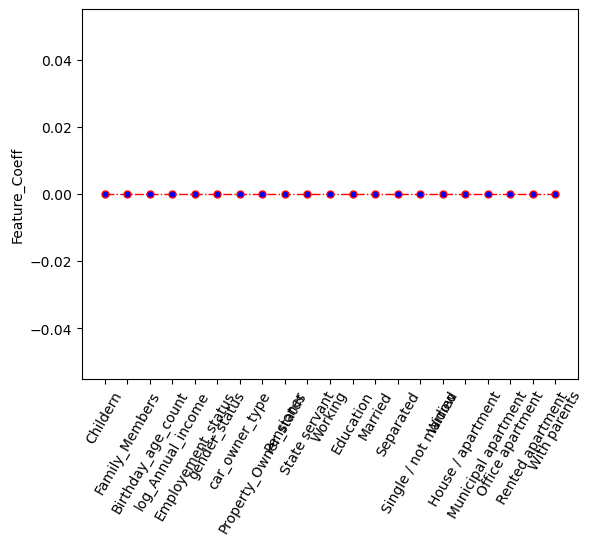%0A)

### Tree Based Feature Selection<a href="#Tree-Based-Feature-Selection" class="anchor-link">¶</a>

In \[217\]:

    from sklearn.ensemble import RandomForestClassifier 
    # Import the RFE from sklearn library
    from sklearn.feature_selection import RFE,SelectFromModel

In \[218\]:

    x_train.shape

Out\[218\]:

    (1237, 21)

In \[219\]:

    # Create the Random Forest classifier with desired hyperparameters
    rf_w = RandomForestClassifier(random_state=100, n_estimators=20, min_samples_split=50, min_samples_leaf=40)

    # Fit the model on the entire training data
    rf_w.fit(x_train, y_train)

    # Create K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and calculate accuracy
    scores = cross_val_score(rf_w, x_train, y_train, cv=kf, scoring='accuracy')
    mean_accuracy = scores.mean()
    print("Cross-Validation Mean Accuracy:", mean_accuracy)


    # # Make predictions on the test data
    # y_pred_rf_w = rf_w.predict(x_test)

    # # Calculate accuracy on the test data
    # test_accuracy = metrics.accuracy_score(y_test, y_pred_rf_w)
    # print("Test Accuracy:", test_accuracy)

    Cross-Validation Mean Accuracy: 0.8868094554002873

In \[220\]:

    rf_w.feature_importances_

Out\[220\]:

    array([0.01965082, 0.05180407, 0.21033866, 0.18245786, 0.0136434 ,
           0.05338867, 0.05294782, 0.04293032, 0.10059007, 0.02519048,
           0.0875947 , 0.03079433, 0.01427937, 0.00887875, 0.03728612,
           0.        , 0.06822457, 0.        , 0.        , 0.        ,
           0.        ])

In \[221\]:

    for feature_name, importance in zip(x_train.columns, rf_w.feature_importances_):
        print(f"Feature: {feature_name}, Importance: {importance}")

    Feature: Childern, Importance: 0.019650819257809503
    Feature: Family_Members, Importance: 0.05180406534421369
    Feature: Birthday_age_count, Importance: 0.21033865710008287
    Feature: log_Annual_income, Importance: 0.18245786091687693
    Feature: Employement_status, Importance: 0.013643402996454043
    Feature: gender_status, Importance: 0.053388672910069934
    Feature: car_owner_type, Importance: 0.0529478212474405
    Feature: Property_Owner_status, Importance: 0.04293031883724936
    Feature: Pensioner, Importance: 0.10059007008316986
    Feature: State servant, Importance: 0.025190476492977214
    Feature: Working, Importance: 0.087594697796042
    Feature: Education, Importance: 0.03079433124634342
    Feature: Married, Importance: 0.014279367003759355
    Feature: Separated, Importance: 0.008878749637655371
    Feature: Single / not married, Importance: 0.03728611972374269
    Feature: Widow, Importance: 0.0
    Feature: House / apartment, Importance: 0.06822456940611324
    Feature: Municipal apartment, Importance: 0.0
    Feature: Office apartment, Importance: 0.0
    Feature: Rented apartment, Importance: 0.0
    Feature: With parents, Importance: 0.0

In \[222\]:

    x_train.shape

Out\[222\]:

    (1237, 21)

In \[223\]:

    rf_w.feature_importances_.shape

Out\[223\]:

    (21,)

In \[224\]:

    new_df= pd.DataFrame({'features': x_train.columns,'importances':rf_w.feature_importances_})

    new_df.head(2)

Out\[224\]:

|     | features       | importances |
|-----|----------------|-------------|
| 0   | Childern       | 0.019651    |
| 1   | Family_Members | 0.051804    |

In \[225\]:

    # get the importance of the resulting features.

    # create a data frame for visualization.
    new_df= pd.DataFrame({'features': x_train.columns,'importances':rf_w.feature_importances_})
    new_df.set_index('importances')

    # sort in ascending order to better visualization.
    new_df = new_df.sort_values('importances')

    # plot the feature importances in bars.
    plt.figure(figsize=(10,3))
    plt.xticks(rotation=45)
    sns.barplot(x="features",y= "importances", data=new_df)

Out\[225\]:

    <AxesSubplot:xlabel='features', ylabel='importances'>

![](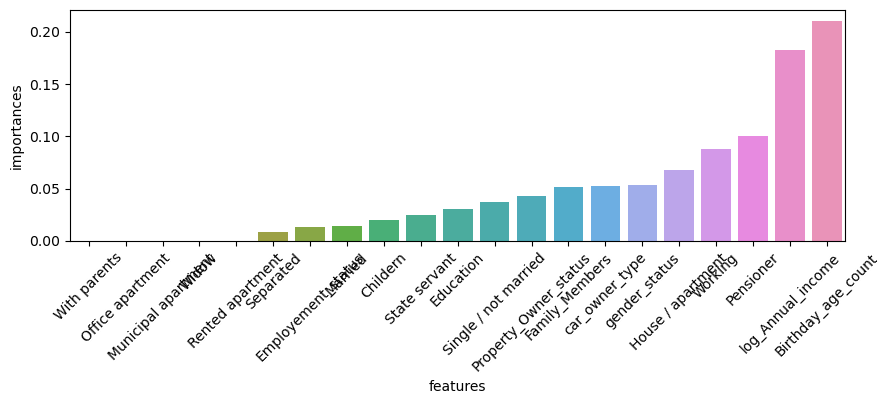%0A)

### PCA -Principal Conponent Analysis(Feature extraction method for reducing columns)<a
href="#PCA--Principal-Conponent-Analysis(Feature-extraction-method-for-reducing-columns)"
class="anchor-link">¶</a>

\## Assumption of PCA is to converting high dimensional(feature) to low
dimensional.

In \[226\]:

    from sklearn.decomposition import PCA
    from sklearn.neighbors import KNeighborsClassifier

In \[227\]:

    x_train.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1237 entries, 1138 to 1078
    Data columns (total 21 columns):
     #   Column                 Non-Null Count  Dtype  
    ---  ------                 --------------  -----  
     0   Childern               1237 non-null   int64  
     1   Family_Members         1237 non-null   int64  
     2   Birthday_age_count     1237 non-null   float64
     3   log_Annual_income      1237 non-null   float64
     4   Employement_status     1237 non-null   int64  
     5   gender_status          1237 non-null   uint8  
     6   car_owner_type         1237 non-null   uint8  
     7   Property_Owner_status  1237 non-null   uint8  
     8   Pensioner              1237 non-null   uint8  
     9   State servant          1237 non-null   uint8  
     10  Working                1237 non-null   uint8  
     11  Education              1237 non-null   int64  
     12  Married                1237 non-null   uint8  
     13  Separated              1237 non-null   uint8  
     14  Single / not married   1237 non-null   uint8  
     15  Widow                  1237 non-null   uint8  
     16  House / apartment      1237 non-null   uint8  
     17  Municipal apartment    1237 non-null   uint8  
     18  Office apartment       1237 non-null   uint8  
     19  Rented apartment       1237 non-null   uint8  
     20  With parents           1237 non-null   uint8  
    dtypes: float64(2), int64(4), uint8(15)
    memory usage: 85.8 KB

In \[228\]:

    x_train['Rented apartment'].unique()

Out\[228\]:

    array([0, 1], dtype=uint8)

In \[229\]:

    x_test.head(1)

Out\[229\]:

|     | Childern | Family_Members | Birthday_age_count | log_Annual_income | Employement_status | gender_status | car_owner_type | Property_Owner_status | Pensioner | State servant | ... | Education | Married | Separated | Single / not married | Widow | House / apartment | Municipal apartment | Office apartment | Rented apartment | With parents |
|-----|----------|----------------|--------------------|-------------------|--------------------|---------------|----------------|-----------------------|-----------|---------------|-----|-----------|---------|-----------|----------------------|-------|-------------------|---------------------|------------------|------------------|--------------|
| 287 | 0        | 2              | -0.429715          | -1.519399         | 1                  | 1             | 0              | 0                     | 0         | 0             | ... | 5         | 0       | 0         | 0                    | 0     | 1                 | 0                   | 0                | 0                | 0            |

1 rows × 21 columns

In \[230\]:

    y_test.shape

Out\[230\]:

    (310,)

In \[231\]:

    pca=PCA(n_components=11, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=4)

In \[232\]:

    x_train_pca= pca.fit_transform(x_train)
    x_test_pca= pca.fit_transform(x_test)

In \[233\]:

    y_test.head(1)

Out\[233\]:

    287    0
    Name: label, dtype: int64

In \[234\]:

    y_train.shape

Out\[234\]:

    (1237,)

### Accuracy Score Without PCA<a href="#Accuracy-Score-Without-PCA" class="anchor-link">¶</a>

### using SVM Model<a href="#using-SVM-Model" class="anchor-link">¶</a>

In \[235\]:

    from sklearn.svm import SVC
    svm= SVC(C=1.0, kernel='rbf',
             degree=3, gamma='scale',
             shrinking=True, probability=False,
             tol=0.001, random_state=42)

In \[236\]:

    svm.fit(x_train,y_train)
    # y_pred= svm.predict(x_test)
    # accuracy= accuracy_score(y_pred,y_test)
    # print(accuracy)

Out\[236\]:

    SVC(random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(random_state=42)

In \[237\]:

    c_validation=np.mean(cross_val_score(svm,x_train,y_train,cv=10))
    print("cross_validation :{:.2f}%".format(c_validation*100))

    cross_validation :88.68%

### Accuracy Score After PCA<a href="#Accuracy-Score-After-PCA" class="anchor-link">¶</a>

In \[238\]:

    # Appling PCA 
    pca=PCA(n_components=6, svd_solver='auto', tol=0.0,
            iterated_power='auto', n_oversamples=10,
            power_iteration_normalizer='auto', 
            random_state=4)
    x_train_pca= pca.fit_transform(x_train)
    x_test_pca= pca.fit_transform(x_test)

In \[239\]:

    # eigen values (lambda)
    pca.explained_variance_

Out\[239\]:

    array([1.61469629, 1.1317985 , 0.8234924 , 0.46942728, 0.31429597,
           0.25577554])

In \[240\]:

    #eigen vectors
    pca.components_.shape

Out\[240\]:

    (6, 21)

#### Finding the Optimum Number of PCA Components<a href="#Finding-the-Optimum-Number-of-PCA-Components"
class="anchor-link">¶</a>

In \[241\]:

    pca.explained_variance_ratio_*100
    # its explained how much % each components holds (n_components=6, has opted earlier)

Out\[241\]:

    array([28.5807657 , 20.03328297, 14.57614263,  8.30904928,  5.56316354,
            4.52732871])

In \[242\]:

    pca=PCA(n_components=None, svd_solver='auto', tol=0.0,
            iterated_power='auto', n_oversamples=10,
            power_iteration_normalizer='auto', 
            random_state=4)
    x_train_pca= pca.fit_transform(x_train)
    x_test_pca= pca.fit_transform(x_test)

In \[243\]:

    pca.explained_variance_.shape

Out\[243\]:

    (21,)

In \[244\]:

    pca.explained_variance_ratio_*100
    # its explained how much % each components holds (n_components=6, has opted earlier)

Out\[244\]:

    array([2.85807657e+01, 2.00332830e+01, 1.45761426e+01, 8.30904928e+00,
           5.56316354e+00, 4.52732871e+00, 3.89750537e+00, 3.40590444e+00,
           2.63618325e+00, 2.28117782e+00, 1.79831573e+00, 1.26823053e+00,
           8.86537102e-01, 7.78186645e-01, 5.81259496e-01, 4.52983814e-01,
           2.72258913e-01, 7.04643709e-02, 5.08539242e-02, 2.05967253e-02,
           9.80903415e-03])

In \[245\]:

    pca.components_.shape

Out\[245\]:

    (21, 21)

In \[246\]:

    ## Appling cumulative sum 
    np.cumsum(pca.explained_variance_ratio_*100)

Out\[246\]:

    array([ 28.5807657 ,  48.61404867,  63.1901913 ,  71.49924058,
            77.06240412,  81.58973283,  85.4872382 ,  88.89314264,
            91.52932589,  93.81050371,  95.60881944,  96.87704998,
            97.76358708,  98.54177372,  99.12303322,  99.57601703,
            99.84827595,  99.91874032,  99.96959424,  99.99019097,
           100.        ])

In \[247\]:

    plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

Out\[247\]:

    [<matplotlib.lines.Line2D at 0x207692aa250>]

![](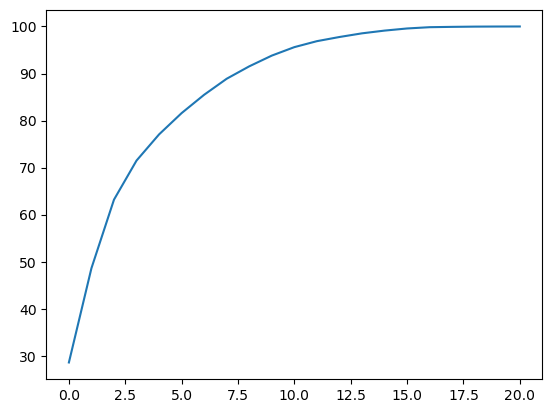%0A)

\## As graph shows if needs 90% variance explained in 8-9 features \##
If looking for 95% variance explained in 10-11 features so I opted 11
features for model traning

In \[248\]:

    pca=PCA(n_components=11, svd_solver='auto', tol=0.0,
            iterated_power='auto', n_oversamples=10,
            power_iteration_normalizer='auto', 
            random_state=4)
    x_train_pca= pca.fit_transform(x_train)
    x_test_pca= pca.fit_transform(x_test)

In \[249\]:

    x_train_pca.shape

Out\[249\]:

    (1237, 11)

In \[250\]:

    ## Cross_Validation 
    c_validation=np.mean(cross_val_score(svm,x_train_pca,y_train,cv=4))
    c_validation

Out\[250\]:

    0.8868227372377074

In \[251\]:

    x_train_pca.shape

Out\[251\]:

    (1237, 11)

#### Train the Model with Simple Vector Classif<a href="#Train-the-Model-with-Simple-Vector-Classif"
class="anchor-link">¶</a>

In \[252\]:

    svm= SVC(C=1.0, kernel='rbf',
             degree=3, gamma='scale',
             shrinking=True, probability=False,
             tol=0.001, random_state=42)


    # Train the SVM model on PCA-transformed data
    svm.fit(x_train_pca, y_train)

    # Make predictions
    y_pred_pca = svm.predict(x_test_pca)

    # Calculate accuracy score
    accuracy_score(y_pred_pca, y_test)

Out\[252\]:

    0.8870967741935484

### Recursive Feature Selection - Selected Feature<a href="#Recursive-Feature-Selection---Selected-Feature"
class="anchor-link">¶</a>

\## Best Feature selection techniques for this dataset is Recursive
feature selection because it provides 89.3% accuracy in logistic
regression , by 10 feature. \## by embedded method In Random forest
getting same accuracy with 19 features

In \[253\]:

    [rfe.support_]

Out\[253\]:

    [array([False, False, False, False,  True,  True, False, False,  True,
             True, False, False,  True,  True,  True,  True,  True, False,
            False, False,  True])]

In \[254\]:

    selected_feature_indices = np.arange(x_train.shape[1])[rfe.support_]
    selected_features = x_train.columns[selected_feature_indices]
    selected_features

Out\[254\]:

    Index(['Employement_status', 'gender_status', 'Pensioner', 'State servant',
           'Married', 'Separated', 'Single / not married', 'Widow',
           'House / apartment', 'With parents'],
          dtype='object')

In \[255\]:

    np.arange(x_train.shape[1])[rfe.support_]

Out\[255\]:

    array([ 4,  5,  8,  9, 12, 13, 14, 15, 16, 20])

In \[256\]:

    # columns_final= x_train.columns[rfe.support_]
    # # x_train_final=
    # # x_test_final=
    # pd.DataFrame(x_train,columns=columns_final)

### Final x_train, x_test has selected from Recursive Method<a href="#Final-x_train,-x_test-has-selected-from-Recursive-Method"
class="anchor-link">¶</a>

In \[257\]:

    x_train_final= x_train.iloc[:,[ 4,  5,  8,  9, 12, 13, 14, 15, 16, 20]]
    print(x_train_final.columns)
    print(x_train_final.shape)

    Index(['Employement_status', 'gender_status', 'Pensioner', 'State servant',
           'Married', 'Separated', 'Single / not married', 'Widow',
           'House / apartment', 'With parents'],
          dtype='object')
    (1237, 10)

In \[258\]:

    x_train_final.head(3)

Out\[258\]:

|      | Employement_status | gender_status | Pensioner | State servant | Married | Separated | Single / not married | Widow | House / apartment | With parents |
|------|--------------------|---------------|-----------|---------------|---------|-----------|----------------------|-------|-------------------|--------------|
| 1138 | 1                  | 0             | 0         | 0             | 0       | 0         | 0                    | 1     | 1                 | 0            |
| 888  | 1                  | 0             | 0         | 0             | 0       | 0         | 1                    | 0     | 1                 | 0            |
| 670  | 1                  | 0             | 0         | 0             | 1       | 0         | 0                    | 0     | 1                 | 0            |

In \[259\]:

    x_test_final=x_test.iloc[:,[ 4,  5,  8,  9, 12, 13, 14, 15, 16, 20]]
    print(x_test_final.columns)
    print(x_test_final.shape)

    Index(['Employement_status', 'gender_status', 'Pensioner', 'State servant',
           'Married', 'Separated', 'Single / not married', 'Widow',
           'House / apartment', 'With parents'],
          dtype='object')
    (310, 10)

In \[260\]:

    x_test_final.head(3)

Out\[260\]:

|     | Employement_status | gender_status | Pensioner | State servant | Married | Separated | Single / not married | Widow | House / apartment | With parents |
|-----|--------------------|---------------|-----------|---------------|---------|-----------|----------------------|-------|-------------------|--------------|
| 287 | 1                  | 1             | 0         | 0             | 0       | 0         | 0                    | 0     | 1                 | 0            |
| 165 | 1                  | 0             | 0         | 0             | 1       | 0         | 0                    | 0     | 1                 | 0            |
| 114 | 1                  | 0             | 0         | 0             | 1       | 0         | 0                    | 0     | 1                 | 0            |

### Gradient descent adjusts coeff and intercept parameters to minimize the loss function<a
href="#Gradient-descent-adjusts-coeff-and-intercept-parameters-to-minimize-the-loss-function"
class="anchor-link">¶</a>

### Appling stochastic gradient descent<a href="#Appling-stochastic-gradient-descent" class="anchor-link">¶</a>

In \[ \]:

     

In \[261\]:

    import numpy as np
    from sklearn.linear_model import SGDClassifier




    # Create an SGDClassifier
    sgd_classifier = SGDClassifier(loss='log_loss',penalty='l1',
                                   alpha=0.001, max_iter=100,
                                   random_state=42,
                                   learning_rate='optimal',eta0=1)


    # SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)

    # Training the classifier using Stochastic Gradient Descent
    sgd_classifier.fit(x_train_final, y_train)

    # Make predictions on the test set
    y_pred = sgd_classifier.predict(x_test_final)

    # Calculate accuracy
    # accuracy = accuracy_score(y_test, y_pred)
    # print("Accuracy:", accuracy)

    np.mean(cross_val_score(sgd_classifier,x_train_final,y_train,cv=6))

Out\[261\]:

    0.8868251958163312

### Hyperparameter Tuning<a href="#Hyperparameter-Tuning" class="anchor-link">¶</a>

Choose following method for hyperparameter tuning RandomizedSearchCV
--\> Fast GridSearchCV Assign hyperparameters in form of dictionery Fit
the model Check best paramters and best scoreGridSearchCV - purforms the
cross-validation for each combination, so takes much time and
computational power RandomizedSearchCV- Randomly sample a subset of
specified number of hyperparameter combination from search space

In \[262\]:

    # Creating the Random Forest classifier with desired hyperparameters
    rf_w = RandomForestClassifier(random_state=100, n_estimators=20, min_samples_split=50, min_samples_leaf=40)

    # Fit the model on the entire training data
    rf_w.fit(x_train_final, y_train) # x_train_final having 10 best feature, got from recursive feature selection 

    # Create K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and calculate accuracy
    scores = cross_val_score(rf_w, x_train, y_train, cv=kf, scoring='accuracy')
    mean_accuracy = scores.mean()
    print("Cross-Validation Mean Accuracy:", mean_accuracy)


    # Make predictions on the test data
    y_pred_rf_w = rf_w.predict(x_test_final)

    # Calculate accuracy on the test data
    test_accuracy = accuracy_score(y_test, y_pred_rf_w)
    print("Test Accuracy:", test_accuracy)

    Cross-Validation Mean Accuracy: 0.8868094554002873
    Test Accuracy: 0.8870967741935484

In \[263\]:

    #Randomized Search CV
    from sklearn.model_selection import RandomizedSearchCV
    # Number of trees in RandomizedSearchCV
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
    # Number of features to consider at every split

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10, 15, 100]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 5, 10]

In \[264\]:

    # Create the random grid

    random_grid = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}

    # Random search of parameters, using 5 fold cross validation, 
    # search across 100 different combinations

    rf_random = RandomizedSearchCV(estimator = rf_w,
                                   param_distributions = random_grid,scoring= 'roc_auc_ovo',
                                   n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1,error_score='raise')



    rf_random.fit(x_train,y_train)

    Fitting 5 folds for each of 10 candidates, totalling 50 fits
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.8s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.7s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.8s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.8s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.9s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.6s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.5s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.5s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.5s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.5s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.9s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.8s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.9s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.9s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.9s

Out\[264\]:

    RandomizedSearchCV(cv=5, error_score='raise',
                       estimator=RandomForestClassifier(min_samples_leaf=40,
                                                        min_samples_split=50,
                                                        n_estimators=20,
                                                        random_state=100),
                       n_jobs=1,
                       param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                            'min_samples_leaf': [1, 2, 5, 10],
                                            'min_samples_split': [2, 5, 10, 15,
                                                                  100],
                                            'n_estimators': [100, 200, 300, 400,
                                                             500, 600, 700, 800,
                                                             900, 1000, 1100,
                                                             1200]},
                       random_state=42, scoring='roc_auc_ovo', verbose=2)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomizedSearchCV

    RandomizedSearchCV(cv=5, error_score='raise',
                       estimator=RandomForestClassifier(min_samples_leaf=40,
                                                        min_samples_split=50,
                                                        n_estimators=20,
                                                        random_state=100),
                       n_jobs=1,
                       param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                            'min_samples_leaf': [1, 2, 5, 10],
                                            'min_samples_split': [2, 5, 10, 15,
                                                                  100],
                                            'n_estimators': [100, 200, 300, 400,
                                                             500, 600, 700, 800,
                                                             900, 1000, 1100,
                                                             1200]},
                       random_state=42, scoring='roc_auc_ovo', verbose=2)

estimator: RandomForestClassifier

    RandomForestClassifier(min_samples_leaf=40, min_samples_split=50,
                           n_estimators=20, random_state=100)

RandomForestClassifier

    RandomForestClassifier(min_samples_leaf=40, min_samples_split=50,
                           n_estimators=20, random_state=100)

In \[265\]:

    rf_random.best_params_

Out\[265\]:

    {'n_estimators': 100,
     'min_samples_split': 10,
     'min_samples_leaf': 2,
     'max_depth': 25}

In \[266\]:

    best_praram_grid= {'n_estimators': 100,
     'min_samples_split': 10,
     'min_samples_leaf': 2,
     'max_depth': 25}
    rf_random = RandomizedSearchCV(estimator = rf_w,
                                   param_distributions = random_grid,scoring= 'roc_auc_ovo',
                                   n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1,error_score='raise')

    rf_random.fit(x_train,y_train)

    Fitting 5 folds for each of 10 candidates, totalling 50 fits
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.5s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.6s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
    [CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
    [CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.5s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
    [CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
    [CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
    [CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.3s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.3s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.2s
    [CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.3s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
    [CV] END max_depth=30, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.9s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.8s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.9s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.8s
    [CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.8s

Out\[266\]:

    RandomizedSearchCV(cv=5, error_score='raise',
                       estimator=RandomForestClassifier(min_samples_leaf=40,
                                                        min_samples_split=50,
                                                        n_estimators=20,
                                                        random_state=100),
                       n_jobs=1,
                       param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                            'min_samples_leaf': [1, 2, 5, 10],
                                            'min_samples_split': [2, 5, 10, 15,
                                                                  100],
                                            'n_estimators': [100, 200, 300, 400,
                                                             500, 600, 700, 800,
                                                             900, 1000, 1100,
                                                             1200]},
                       random_state=42, scoring='roc_auc_ovo', verbose=2)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomizedSearchCV

    RandomizedSearchCV(cv=5, error_score='raise',
                       estimator=RandomForestClassifier(min_samples_leaf=40,
                                                        min_samples_split=50,
                                                        n_estimators=20,
                                                        random_state=100),
                       n_jobs=1,
                       param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                            'min_samples_leaf': [1, 2, 5, 10],
                                            'min_samples_split': [2, 5, 10, 15,
                                                                  100],
                                            'n_estimators': [100, 200, 300, 400,
                                                             500, 600, 700, 800,
                                                             900, 1000, 1100,
                                                             1200]},
                       random_state=42, scoring='roc_auc_ovo', verbose=2)

estimator: RandomForestClassifier

    RandomForestClassifier(min_samples_leaf=40, min_samples_split=50,
                           n_estimators=20, random_state=100)

RandomForestClassifier

    RandomForestClassifier(min_samples_leaf=40, min_samples_split=50,
                           n_estimators=20, random_state=100)

In \[267\]:

    prediction = rf_random.predict(x_test)

In \[268\]:

    print('accuracy_score:', metrics.accuracy_score(y_test, prediction))

    accuracy_score: 0.8870967741935484

### Appling Gradient Boosting to check the Improvement in Accuracy<a
href="#Appling-Gradient-Boosting-to-check-the-Improvement-in-Accuracy"
class="anchor-link">¶</a>

In \[269\]:

    from sklearn.ensemble import GradientBoostingClassifier

    clf = GradientBoostingClassifier(
        n_estimators=100,    # Number of boosting stages 
        learning_rate=0.1,   # Learning rate 
        max_depth=3,         # Maximum depth of each tree 
        random_state=42,     # Seed for reproducibility
        max_features='sqrt'
    )

In \[270\]:

    gb_clf = GradientBoostingClassifier( loss='log_loss' ,                                   
                learning_rate=0.1, n_estimators=100, 
                subsample=1.0, criterion='friedman_mse',
                min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_depth=3) 

In \[271\]:

    gb_clf.fit(x_train_final,y_train)

Out\[271\]:

    GradientBoostingClassifier()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GradientBoostingClassifier

    GradientBoostingClassifier()

In \[272\]:

    y_gb_pred= gb_clf.predict(x_test_final)

In \[273\]:

    cross_val= np.mean(cross_val_score(gb_clf,x_train_final,y_train))
    cross_val

Out\[273\]:

    0.8843901005615777

In \[274\]:

    accuracy_scr= accuracy_score(y_gb_pred,y_test)
    accuracy_scr

Out\[274\]:

    0.8935483870967742

### Insights :<a href="#Insights-:" class="anchor-link">¶</a>

89.35% Accuracy is constant from logistic regression,svm, random forest.
so we can consider any 1 of three.

-   After feature scaling 10 features is extracted from Recursive
    feature selection so i consider this for ML

### connecting to mysql for furthur queries<a href="#connecting-to-mysql-for-furthur-queries"
class="anchor-link">¶</a>

In \[275\]:

    dataset_for_sql.head(2)

Out\[275\]:

|     | Ind_ID  | GENDER | Car_Owner | Property_Owner | Childern | Annual_income | Type_Income          | EDUCATION        | Marital_status | Housing_type      | Family_Members | label | Birthday_age_count | Employement_status | Age_Group | Income_Group |
|-----|---------|--------|-----------|----------------|----------|---------------|----------------------|------------------|----------------|-------------------|----------------|-------|--------------------|--------------------|-----------|--------------|
| 0   | 5008827 | M      | Y         | Y              | 0        | 180000.0      | Pensioner            | Higher education | Married        | House / apartment | 2              | 1     | 51                 | 0                  | 45-55     | 100k+        |
| 1   | 5009744 | F      | Y         | N              | 0        | 315000.0      | Commercial associate | Higher education | Married        | House / apartment | 2              | 1     | 37                 | 1                  | 35-45     | 100k+        |

In \[276\]:

    dataset_for_sql.columns

Out\[276\]:

    Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'Childern',
           'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
           'Housing_type', 'Family_Members', 'label', 'Birthday_age_count',
           'Employement_status', 'Age_Group', 'Income_Group'],
          dtype='object')

In \[277\]:

    ## droping 2 features which is not required for sql queries
    dataset_for_sql.drop(columns=['Age_Group','Income_Group'],inplace=True)

In \[278\]:

    # import pymysql

    # try:
    #     # Create a cursor object to interact with the database
    #     connection = pymysql.connect(
    #         host='127.0.0.1',  # Replace with your MySQL host (IP or hostname)
    #         port=3306,          # Specify the port separately
    #         user='root',        # Replace with your MySQL username
    #         password='Mysql@1994',  # Replace with your MySQL password
    #         database='credit_card'  # Replace with your MySQL database name
    #     )
    #     cursor = connection.cursor()

    #     # Define the table name you want to insert data into
    #     table_name = 'credit_approval'

    #     # Define the SQL query to insert data into the table
    #     insert_query = f"INSERT INTO {table_name} VALUES (%s" + ", %s" * (len(dataset_for_sql.columns) - 1) + ")"

    #     # Convert the DataFrame to a list of tuples for insertion
    #     data_to_insert = [tuple(row) for row in dataset_for_sql.values]

    #     # Execute the insertion query
    #     cursor.executemany(insert_query, data_to_insert)

    #     # Commit the changes to the database
    #     connection.commit()

    #     print(f'DataFrame data has been added to the MySQL table: {table_name}')
    # except pymysql.Error as e:
    #     print(f'Error: {e}')
    # finally:
    #     # Close the cursor and the database connection
    #     if connection and connection.open:
    #         cursor.close()
    #         connection.close()
    #         print('Database connection closed.')